<a href="https://colab.research.google.com/github/fabianosferreira/dataset/blob/main/DataSet_Notif_Ofid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
import pandas as pd
import glob
import os

# Montar o Google Drive
drive.mount('/content/drive')

# Caminho da pasta com os arquivos CSV no Drive
pasta = '/content/drive/My Drive/Colab Notebooks/Data_CD'

# Listar arquivos CSV na pasta
arquivos_csv = glob.glob(os.path.join(pasta, "*.csv"))

if not arquivos_csv:
    print("Nenhum arquivo .csv encontrado na pasta informada.")
else:
    print(f"{len(arquivos_csv)} arquivos encontrados. Iniciando a junção...")

dataframes = []

for arquivo in arquivos_csv:
    print(f"Lendo: {os.path.basename(arquivo)}")
    try:
        df = pd.read_csv(arquivo, encoding='utf-8', sep=',')
    except UnicodeDecodeError:
        df = pd.read_csv(arquivo, encoding='latin1', sep=',')
    df['arquivo_origem'] = os.path.basename(arquivo)
    dataframes.append(df)



# Salvar resultado no Drive
saida = os.path.join(pasta, "dados_ofidicos_unidos.csv")


print(f"\n✅ Arquivos unidos com sucesso! Arquivo salvo em: {saida}")


Mounted at /content/drive
6 arquivos encontrados. Iniciando a junção...
Lendo: ANIMBR19.csv


/tmp/ipython-input-5-1635323849.py:25: DtypeWarning: Columns (44,64,69,72,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(arquivo, encoding='utf-8', sep=',')


Lendo: ANIMBR20.csv


/tmp/ipython-input-5-1635323849.py:25: DtypeWarning: Columns (21,41,44,69,70,72) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(arquivo, encoding='utf-8', sep=',')


Lendo: ANIMBR21.csv


/tmp/ipython-input-5-1635323849.py:25: DtypeWarning: Columns (21,41,44,69,72) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(arquivo, encoding='utf-8', sep=',')


Lendo: ANIMBR22.csv


/tmp/ipython-input-5-1635323849.py:25: DtypeWarning: Columns (21,41,43,44,69,72) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(arquivo, encoding='utf-8', sep=',')


Lendo: ANIMBR23.csv


/tmp/ipython-input-5-1635323849.py:25: DtypeWarning: Columns (21,41,44,69,70,72) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(arquivo, encoding='utf-8', sep=',')


Lendo: ANIMBR24.csv

✅ Arquivos unidos com sucesso! Arquivo salvo em: /content/drive/My Drive/Colab Notebooks/Data_CD/dados_ofidicos_unidos.csv


/tmp/ipython-input-5-1635323849.py:25: DtypeWarning: Columns (21,41,43,44,64,69,70,72) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(arquivo, encoding='utf-8', sep=',')


In [6]:
# Concatenar todos os dataframes
dados_unidos = pd.concat(dataframes, ignore_index=True)
dados_unidos.to_csv(saida, index=False, encoding='utf-8-sig', sep=',')

In [7]:
#Visualizando as 5 primeiras linhas dos dados
dados_unidos.head()


,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,DT_SIN_PRI,SEM_PRI,...,COM_RENAL,COM_EDEMA,COM_SEPTIC,COM_CHOQUE,DOENCA_TRA,EVOLUCAO,DT_OBITO,DT_ENCERRA,DT_DIGITA,arquivo_origem
0,2,X29,2019-01-01,201901,2019,29,290520,NaN,2019-01-01,201901,...,NaN,NaN,NaN,NaN,2.0,1.0,NaN,2019-01-01,NaN,ANIMBR19.csv
1,2,X29,2019-01-01,201901,2019,29,290520,NaN,2018-01-01,201801,...,NaN,NaN,NaN,NaN,2.0,1.0,NaN,2019-01-01,NaN,ANIMBR19.csv
2,2,X29,2019-01-01,201901,2019,29,290520,NaN,2019-01-01,201901,...,NaN,NaN,NaN,NaN,9.0,1.0,NaN,2019-01-01,NaN,ANIMBR19.csv
3,2,X29,2019-01-01,201901,2019,29,290520,NaN,2019-01-01,201901,...,NaN,NaN,NaN,NaN,9.0,NaN,NaN,2019-01-01,NaN,ANIMBR19.csv
4,2,X29,2019-01-01,201901,2019,29,290520,NaN,2019-01-01,201901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01,NaN,ANIMBR19.csv


In [8]:
#Qual a quantidade de linhas e de colunas contidas no arquivo?
dados_unidos.shape

(1780616, 77)

In [9]:

#Observando quais colunas possui DataFrame
dados_unidos.columns

Index(['TP_NOT', 'ID_AGRAVO', 'DT_NOTIFIC', 'SEM_NOT', 'NU_ANO', 'SG_UF_NOT',
       'ID_MUNICIP', 'ID_REGIONA', 'DT_SIN_PRI', 'SEM_PRI', 'ANO_NASC',
       'NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'SG_UF',
       'ID_MN_RESI', 'ID_RG_RESI', 'ID_PAIS', 'DT_INVEST', 'ID_OCUPA_N',
       'ANT_DT_ACI', 'ANT_UF', 'ANT_MUNIC_', 'ANT_LOCALI', 'ANT_TEMPO_',
       'ANT_LOCA_1', 'MCLI_LOCAL', 'CLI_DOR', 'CLI_EDEMA', 'CLI_EQUIMO',
       'CLI_NECROS', 'CLI_LOCAL_', 'CLI_LOCA_1', 'MCLI_SIST', 'CLI_NEURO',
       'CLI_HEMORR', 'CLI_VAGAIS', 'CLI_MIOLIT', 'CLI_RENAL', 'CLI_OUTR_2',
       'CLI_OUTR_3', 'CLI_TEMPO_', 'TP_ACIDENT', 'ANI_TIPO_1', 'ANI_SERPEN',
       'ANI_ARANHA', 'ANI_LAGART', 'TRA_CLASSI', 'CON_SOROTE', 'NU_AMPOLAS',
       'NU_AMPOL_1', 'NU_AMPOL_8', 'NU_AMPOL_6', 'NU_AMPOL_4', 'NU_AMPO_7',
       'NU_AMPO_5', 'NU_AMPOL_9', 'NU_AMPOL_3', 'COM_LOC', 'COM_SECUND',
       'COM_NECROS', 'COM_COMPOR', 'COM_DEFICT', 'COM_APUTAC', 'COM_SISTEM',
       'COM_RENAL', 

In [10]:
#Deixando apenas as colunas relevantes
colunas_mantidas = ['DT_NOTIFIC', 'SEM_NOT', 'NU_ANO', 'SG_UF_NOT',
       'ID_MUNICIP', 'ID_REGIONA', 'DT_SIN_PRI', 'SEM_PRI', 'ANO_NASC',
       'NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'SG_UF',
       'ID_MN_RESI', 'ID_RG_RESI', 'ID_PAIS', 'DT_INVEST', 'ID_OCUPA_N',
       'ANT_DT_ACI', 'ANT_UF', 'ANT_MUNIC_', 'ANT_LOCALI', 'ANT_TEMPO_',
       'ANT_LOCA_1', 'MCLI_LOCAL', 'CLI_DOR', 'CLI_EDEMA', 'CLI_EQUIMO',
       'CLI_NECROS', 'CLI_LOCAL_', 'CLI_LOCA_1', 'MCLI_SIST', 'CLI_NEURO',
       'CLI_HEMORR', 'CLI_VAGAIS', 'CLI_MIOLIT', 'CLI_RENAL', 'CLI_OUTR_2',
       'CLI_OUTR_3', 'CLI_TEMPO_', 'TP_ACIDENT', 'ANI_TIPO_1', 'ANI_SERPEN',
       'ANI_ARANHA', 'ANI_LAGART', 'TRA_CLASSI', 'CON_SOROTE', 'NU_AMPOLAS',
       'NU_AMPOL_1', 'NU_AMPOL_8', 'NU_AMPOL_6', 'NU_AMPOL_4', 'NU_AMPO_7',
       'NU_AMPO_5', 'NU_AMPOL_9', 'NU_AMPOL_3', 'COM_LOC', 'COM_SECUND',
       'COM_NECROS', 'COM_COMPOR', 'COM_DEFICT', 'COM_APUTAC', 'COM_SISTEM',
       'COM_RENAL', 'COM_EDEMA', 'COM_SEPTIC', 'COM_CHOQUE', 'DOENCA_TRA',
       'EVOLUCAO', 'DT_OBITO', 'DT_ENCERRA', 'DT_DIGITA']

In [11]:
#Salvando e sobreescrevendo as novas informações na variável dados
dados_unidos = dados_unidos[colunas_mantidas].reset_index(drop=True)

dados_unidos.head()

,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,DT_SIN_PRI,SEM_PRI,ANO_NASC,NU_IDADE_N,...,COM_SISTEM,COM_RENAL,COM_EDEMA,COM_SEPTIC,COM_CHOQUE,DOENCA_TRA,EVOLUCAO,DT_OBITO,DT_ENCERRA,DT_DIGITA
0,2019-01-01,201901,2019,29,290520,NaN,2019-01-01,201901,2011.0,4007,...,2.0,NaN,NaN,NaN,NaN,2.0,1.0,NaN,2019-01-01,NaN
1,2019-01-01,201901,2019,29,290520,NaN,2018-01-01,201801,1942.0,4075,...,2.0,NaN,NaN,NaN,NaN,2.0,1.0,NaN,2019-01-01,NaN
2,2019-01-01,201901,2019,29,290520,NaN,2019-01-01,201901,1992.0,4026,...,9.0,NaN,NaN,NaN,NaN,9.0,1.0,NaN,2019-01-01,NaN
3,2019-01-01,201901,2019,29,290520,NaN,2019-01-01,201901,1991.0,4027,...,9.0,NaN,NaN,NaN,NaN,9.0,NaN,NaN,2019-01-01,NaN
4,2019-01-01,201901,2019,29,290520,NaN,2019-01-01,201901,1996.0,4022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01,NaN


In [12]:
#Substituindo os números da coluna por "Sim, não e Ignorado"
dados_unidos['MCLI_LOCAL'] = dados_unidos['MCLI_LOCAL'].replace({1: 'Sim', 2: 'Não', 9: 'Ignorado'})
dados_unidos.head()

,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,DT_SIN_PRI,SEM_PRI,ANO_NASC,NU_IDADE_N,...,COM_SISTEM,COM_RENAL,COM_EDEMA,COM_SEPTIC,COM_CHOQUE,DOENCA_TRA,EVOLUCAO,DT_OBITO,DT_ENCERRA,DT_DIGITA
0,2019-01-01,201901,2019,29,290520,NaN,2019-01-01,201901,2011.0,4007,...,2.0,NaN,NaN,NaN,NaN,2.0,1.0,NaN,2019-01-01,NaN
1,2019-01-01,201901,2019,29,290520,NaN,2018-01-01,201801,1942.0,4075,...,2.0,NaN,NaN,NaN,NaN,2.0,1.0,NaN,2019-01-01,NaN
2,2019-01-01,201901,2019,29,290520,NaN,2019-01-01,201901,1992.0,4026,...,9.0,NaN,NaN,NaN,NaN,9.0,1.0,NaN,2019-01-01,NaN
3,2019-01-01,201901,2019,29,290520,NaN,2019-01-01,201901,1991.0,4027,...,9.0,NaN,NaN,NaN,NaN,9.0,NaN,NaN,2019-01-01,NaN
4,2019-01-01,201901,2019,29,290520,NaN,2019-01-01,201901,1996.0,4022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01,NaN


In [13]:
#Função loop para todas as colunas que possuem codificação SIM/NÃO

colunas_sim_nao = ['MCLI_LOCAL','CLI_DOR','CLI_EDEMA', 'CLI_EQUIMO',
                   'CLI_NECROS','CLI_LOCAL_','MCLI_SIST', 'CLI_NEURO',
                   'CLI_HEMORR','CLI_VAGAIS','CLI_MIOLIT','CLI_RENAL',
                   'CLI_OUTR_2', 'CON_SOROTE','COM_LOC','COM_SECUND','COM_NECROS',
                   'COM_COMPOR','COM_DEFICT','COM_APUTAC','COM_SISTEM','COM_RENAL',
                   'COM_EDEMA','COM_SEPTIC','COM_CHOQUE','DOENCA_TRA']


for coluna in colunas_sim_nao:
  dados_unidos[coluna] = dados_unidos[coluna].replace({1: 'Sim', 2: 'Não', 9: 'Ignorado'})

dados_unidos.head()

,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,DT_SIN_PRI,SEM_PRI,ANO_NASC,NU_IDADE_N,...,COM_SISTEM,COM_RENAL,COM_EDEMA,COM_SEPTIC,COM_CHOQUE,DOENCA_TRA,EVOLUCAO,DT_OBITO,DT_ENCERRA,DT_DIGITA
0,2019-01-01,201901,2019,29,290520,NaN,2019-01-01,201901,2011.0,4007,...,Não,NaN,NaN,NaN,NaN,Não,1.0,NaN,2019-01-01,NaN
1,2019-01-01,201901,2019,29,290520,NaN,2018-01-01,201801,1942.0,4075,...,Não,NaN,NaN,NaN,NaN,Não,1.0,NaN,2019-01-01,NaN
2,2019-01-01,201901,2019,29,290520,NaN,2019-01-01,201901,1992.0,4026,...,Ignorado,NaN,NaN,NaN,NaN,Ignorado,1.0,NaN,2019-01-01,NaN
3,2019-01-01,201901,2019,29,290520,NaN,2019-01-01,201901,1991.0,4027,...,Ignorado,NaN,NaN,NaN,NaN,Ignorado,NaN,NaN,2019-01-01,NaN
4,2019-01-01,201901,2019,29,290520,NaN,2019-01-01,201901,1996.0,4022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01,NaN


In [14]:
#Visualizando as 5 primeiras linhas dos dados_unidos
dados_unidos.head()

,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,DT_SIN_PRI,SEM_PRI,ANO_NASC,NU_IDADE_N,...,COM_SISTEM,COM_RENAL,COM_EDEMA,COM_SEPTIC,COM_CHOQUE,DOENCA_TRA,EVOLUCAO,DT_OBITO,DT_ENCERRA,DT_DIGITA
0,2019-01-01,201901,2019,29,290520,NaN,2019-01-01,201901,2011.0,4007,...,Não,NaN,NaN,NaN,NaN,Não,1.0,NaN,2019-01-01,NaN
1,2019-01-01,201901,2019,29,290520,NaN,2018-01-01,201801,1942.0,4075,...,Não,NaN,NaN,NaN,NaN,Não,1.0,NaN,2019-01-01,NaN
2,2019-01-01,201901,2019,29,290520,NaN,2019-01-01,201901,1992.0,4026,...,Ignorado,NaN,NaN,NaN,NaN,Ignorado,1.0,NaN,2019-01-01,NaN
3,2019-01-01,201901,2019,29,290520,NaN,2019-01-01,201901,1991.0,4027,...,Ignorado,NaN,NaN,NaN,NaN,Ignorado,NaN,NaN,2019-01-01,NaN
4,2019-01-01,201901,2019,29,290520,NaN,2019-01-01,201901,1996.0,4022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01,NaN


In [15]:
#Formatando as colunas de data
colunas_data = ['DT_NOTIFIC','DT_SIN_PRI','DT_INVEST','DT_OBITO',
                'DT_ENCERRA','DT_DIGITA','ANT_DT_ACI',]

for coluna in colunas_data:
  dados_unidos[coluna] = pd.to_datetime(dados_unidos[coluna], format = '%Y%m%d', errors='coerce')

dados_unidos.head()

,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,DT_SIN_PRI,SEM_PRI,ANO_NASC,NU_IDADE_N,...,COM_SISTEM,COM_RENAL,COM_EDEMA,COM_SEPTIC,COM_CHOQUE,DOENCA_TRA,EVOLUCAO,DT_OBITO,DT_ENCERRA,DT_DIGITA
0,NaT,201901,2019,29,290520,NaN,NaT,201901,2011.0,4007,...,Não,NaN,NaN,NaN,NaN,Não,1.0,NaT,NaT,NaT
1,NaT,201901,2019,29,290520,NaN,NaT,201801,1942.0,4075,...,Não,NaN,NaN,NaN,NaN,Não,1.0,NaT,NaT,NaT
2,NaT,201901,2019,29,290520,NaN,NaT,201901,1992.0,4026,...,Ignorado,NaN,NaN,NaN,NaN,Ignorado,1.0,NaT,NaT,NaT
3,NaT,201901,2019,29,290520,NaN,NaT,201901,1991.0,4027,...,Ignorado,NaN,NaN,NaN,NaN,Ignorado,NaN,NaT,NaT,NaT
4,NaT,201901,2019,29,290520,NaN,NaT,201901,1996.0,4022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT


In [16]:
#Tratando colunas únicas com base no http://portalsinan.saude.gov.br/images/documentos/Agravos/AAP/DIC_DADOS_Animais_Pedonhentos_v5.pdf
dados_unidos['ANT_TEMPO_'] = dados_unidos['ANT_TEMPO_'].replace({1: '0 - 1h',
                                                   2: '1 - 3h',
                                                   3: '3 - 6h',
                                                   4: '6 - 12h',
                                                   5: '12 e 24h',
                                                   6: '24 e +h',
                                                   9: 'Ignorado'})
################################################################################
dados_unidos['ANT_LOCA_1'] = dados_unidos['ANT_LOCA_1'].replace({1 : 'Cabeça',
                                                  2 : 'Braço',
                                                  3 : 'Ante-Braço',
                                                  4 : 'Mão',
                                                  5 : 'Dedo da Mão',
                                                  6 : 'Tronco',
                                                  7 : 'Coxa',
                                                  8 : 'Perna',
                                                  9 : 'Pé',
                                                  10 : 'Dedo do Pé',
                                                  99 : 'Ignorado'})
################################################################################
dados_unidos['CLI_TEMPO_'] = dados_unidos['CLI_TEMPO_'].replace({1 : 'Normal',
                                                   2 : 'Alterado',
                                                   9 : 'Não realizado'})
################################################################################
dados_unidos['TP_ACIDENT'] = dados_unidos['TP_ACIDENT'].replace({1 : 'Serpente',
2 : 'Aranha',
3 : 'Escorpião',
4 : 'Lagarta',
5 : 'Abelha',
6 : 'Outros',
9 : 'Ignorado'})
################################################################################
dados_unidos['ANI_SERPEN'] = dados_unidos['ANI_SERPEN'].replace({1: 'Botrópico',
                                                   2: 'Crotálico',
                                                   3: 'Elapídico',
                                                   4: 'Laquético',
                                                   5: 'Serpente não peçonhenta',
                                                   9: 'Ignorado'})
################################################################################
dados_unidos['ANI_ARANHA'] = dados_unidos['ANI_ARANHA'].replace({
    1: 'Foneutrismo',
    2: 'Loxoscelismo',
    3: 'Latrodectismo',
    4: 'Outra aranha',
    9: 'Ignorado'
})
################################################################################
dados_unidos['ANI_LAGART'] = dados_unidos['ANI_LAGART'].replace({
    1: 'Lonomia',
    2: 'Outra lagarta',
    9: 'Ignorado'
})
################################################################################
dados_unidos['TRA_CLASSI'] = dados_unidos['TRA_CLASSI'].replace({
    1: 'Leve',
    2: 'Moderado',
    3: 'Grave',
    9: 'Ignorado'

})
################################################################################
dados_unidos['EVOLUCAO'] = dados_unidos['EVOLUCAO'].replace({
    1: 'Cura',
    2: 'Óbito por acidente por animais peçonhentos',
    3: 'Óbito por outras causas',
    9: 'Ignorado'
})
################################################################################
dados_unidos['CS_GESTANT'] = dados_unidos['CS_GESTANT'].replace({
    1: '1º Trimestre',
    2: '2º Trimestre',
    3: '3º Trimestre',
    4: 'Idade Gestacional Ignorada',
    5: 'Não',
    6: 'Não se aplica',
    9: 'Ignorado'
})
################################################################################
dados_unidos['CS_RACA'] = dados_unidos['CS_RACA'].replace({
    1: 'Branca',
    2: 'Preta',
    3: 'Amarela',
    4: 'Parda',
    5: 'Indígena',
    9: 'Ignorado'
})
################################################################################
dados_unidos['CS_ESCOL_N'] = dados_unidos['CS_ESCOL_N'].replace({
    1: '1ª a 4ª Série Incompleta do EF',
    2: '4ª Série Completa do EF (Antigo 1° Grau)',
    3: '5ª à 8ª Série Incompleta do EF (Antigo ginásio ou 1° Grau)',
    4: 'Ensino Fundamental Completo (Antigo ginásio ou 1° Grau)',
    5: 'Ensino Médio Incompleto (antigo colegial ou 2° Grau)',
    6: 'Ensino médio completo (antigo colegial ou 2° Grau)',
    7: 'Educação superior incompleta',
    8: 'Educação superior completa',
    9: 'Ignorado',
    10: 'Não se aplica'
})


In [17]:
dados_unidos.head()

,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,DT_SIN_PRI,SEM_PRI,ANO_NASC,NU_IDADE_N,...,COM_SISTEM,COM_RENAL,COM_EDEMA,COM_SEPTIC,COM_CHOQUE,DOENCA_TRA,EVOLUCAO,DT_OBITO,DT_ENCERRA,DT_DIGITA
0,NaT,201901,2019,29,290520,NaN,NaT,201901,2011.0,4007,...,Não,NaN,NaN,NaN,NaN,Não,Cura,NaT,NaT,NaT
1,NaT,201901,2019,29,290520,NaN,NaT,201801,1942.0,4075,...,Não,NaN,NaN,NaN,NaN,Não,Cura,NaT,NaT,NaT
2,NaT,201901,2019,29,290520,NaN,NaT,201901,1992.0,4026,...,Ignorado,NaN,NaN,NaN,NaN,Ignorado,Cura,NaT,NaT,NaT
3,NaT,201901,2019,29,290520,NaN,NaT,201901,1991.0,4027,...,Ignorado,NaN,NaN,NaN,NaN,Ignorado,NaN,NaT,NaT,NaT
4,NaT,201901,2019,29,290520,NaN,NaT,201901,1996.0,4022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT


In [18]:
#Tratando a coluna idade
#A coluna de IDADE é um pouco diferente. O SINAN utiliza uma decodificação neste formato: A composição da variável obedece o seguinte critério: primeiro dígito:

#Hora
#Dia
#Mês
#Ano
#Exemplos:

#* 3009 - Nove Meses
#* 4018 - Dezoito Anos
#Assim, como apenas nos interessa a idade em anos, diminuiremos todos os números por 4000. Caso o resultado for negativo, deixamos como zero.



# Cria uma nova coluna com idade em anos:
dados_unidos['NU_IDADE_N_'] = (
    pd.to_numeric(dados_unidos['NU_IDADE_N'], errors='coerce')  # garante conversão numérica
    .fillna(0)                                           # trata valores ausentes
    .astype(int)                                         # converte para inteiro
    .where(dados_unidos['NU_IDADE_N'] > 4000, 0)                # valores <= 4000 viram 0
    - 4000                                               # subtrai 4000 dos restantes
)

# Garante que não haja valores negativos após a subtração
dados_unidos['NU_IDADE_N_'] = dados_unidos['NU_IDADE_N_'].clip(lower=0)

# Visualização opcional
print(dados_unidos[['NU_IDADE_N', 'NU_IDADE_N_']].head())


   NU_IDADE_N  NU_IDADE_N_
0        4007            7
1        4075           75
2        4026           26
3        4027           27
4        4022           22


In [19]:
municipios = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data_CD/data_set_complementar/municipios_brasil.csv', sep=';')
municipios.head()

,codigo_sinan,nome_municipio
0,250010,AGUA BRANCA
1,250020,AGUIAR
2,250030,ALAGOA GRANDE
3,250040,ALAGOA NOVA
4,250050,ALAGOINHA


In [20]:
municipios = municipios[['codigo_sinan', 'nome_municipio']]
municipios = municipios.set_index('codigo_sinan')
municipios.head()

,nome_municipio
codigo_sinan,
250010,AGUA BRANCA
250020,AGUIAR
250030,ALAGOA GRANDE
250040,ALAGOA NOVA
250050,ALAGOINHA


In [21]:
# atribuíremos a chave o código do município, e ao seu valor o nome da cidade.
dicionario_municipios = municipios.to_dict()['nome_municipio']

In [22]:
dados_unidos.head()

,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,DT_SIN_PRI,SEM_PRI,ANO_NASC,NU_IDADE_N,...,COM_RENAL,COM_EDEMA,COM_SEPTIC,COM_CHOQUE,DOENCA_TRA,EVOLUCAO,DT_OBITO,DT_ENCERRA,DT_DIGITA,NU_IDADE_N_
0,NaT,201901,2019,29,290520,NaN,NaT,201901,2011.0,4007,...,NaN,NaN,NaN,NaN,Não,Cura,NaT,NaT,NaT,7
1,NaT,201901,2019,29,290520,NaN,NaT,201801,1942.0,4075,...,NaN,NaN,NaN,NaN,Não,Cura,NaT,NaT,NaT,75
2,NaT,201901,2019,29,290520,NaN,NaT,201901,1992.0,4026,...,NaN,NaN,NaN,NaN,Ignorado,Cura,NaT,NaT,NaT,26
3,NaT,201901,2019,29,290520,NaN,NaT,201901,1991.0,4027,...,NaN,NaN,NaN,NaN,Ignorado,NaN,NaT,NaT,NaT,27
4,NaT,201901,2019,29,290520,NaN,NaT,201901,1996.0,4022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,22


In [23]:
dados_unidos['ID_MUNICIP_nome'] = dados_unidos['ID_MUNICIP'].map(dicionario_municipios)

dados_unidos['ID_MN_RESI_nome']= dados_unidos['ID_MN_RESI'].map(dicionario_municipios)

dados_unidos['ANT_MUNIC_nome'] = dados_unidos['ANT_MUNIC_'].map(dicionario_municipios)

dados_unidos.head()



,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,DT_SIN_PRI,SEM_PRI,ANO_NASC,NU_IDADE_N,...,COM_CHOQUE,DOENCA_TRA,EVOLUCAO,DT_OBITO,DT_ENCERRA,DT_DIGITA,NU_IDADE_N_,ID_MUNICIP_nome,ID_MN_RESI_nome,ANT_MUNIC_nome
0,NaT,201901,2019,29,290520,NaN,NaT,201901,2011.0,4007,...,NaN,Não,Cura,NaT,NaT,NaT,7,NaN,NaN,NaN
1,NaT,201901,2019,29,290520,NaN,NaT,201801,1942.0,4075,...,NaN,Não,Cura,NaT,NaT,NaT,75,NaN,NaN,NaN
2,NaT,201901,2019,29,290520,NaN,NaT,201901,1992.0,4026,...,NaN,Ignorado,Cura,NaT,NaT,NaT,26,NaN,NaN,NaN
3,NaT,201901,2019,29,290520,NaN,NaT,201901,1991.0,4027,...,NaN,Ignorado,NaN,NaT,NaT,NaT,27,NaN,NaN,NaN
4,NaT,201901,2019,29,290520,NaN,NaT,201901,1996.0,4022,...,NaN,NaN,NaN,NaT,NaT,NaT,22,NaN,NaN,NaN


In [24]:
#Tratando a coluna UF
dados_unidos['ANT_UF']

,ANT_UF
0,29.0
1,29.0
2,29.0
3,29.0
4,29.0
...,...
1780611,32.0
1780612,32.0
1780613,32.0
1780614,32.0


In [25]:
estados_uf = pd.read_csv(
    '/content/drive/My Drive/Colab Notebooks/Data_CD/data_set_complementar/cod_uf.csv')
estados_uf = estados_uf.set_index('Código UF')
estados_uf.head()

,Unidade da Federação,UF,Populacao
Código UF,,,
11,Rondônia,RO,1805788
12,Acre,AC,829619
13,Amazonas,AM,4063614
14,Roraima,RR,522636
15,Pará,PA,8366628


In [26]:
dicionario_estados_uf = estados_uf.to_dict()['UF']
dicionario_estados_uf

{11: 'RO',
 12: 'AC',
 13: 'AM',
 14: 'RR',
 15: 'PA',
 16: 'AP',
 17: 'TO',
 21: 'MA',
 22: 'PI',
 23: 'CE',
 24: 'RN',
 25: 'PB',
 26: 'PE',
 27: 'AL',
 28: 'SE',
 29: 'BA',
 31: 'MG',
 32: 'ES',
 33: 'RJ',
 35: 'SP',
 41: 'PR',
 42: 'SC',
 43: 'RS',
 50: 'MS',
 51: 'MT',
 52: 'GO',
 53: 'DF'}

In [27]:

dados_unidos['SG_UF_nome'] = dados_unidos['SG_UF'].map(dicionario_estados_uf)
dados_unidos['SG_UF_NOT_nome'] = dados_unidos['SG_UF_NOT'].map(dicionario_estados_uf)
dados_unidos['ANT_UF_nome'] = dados_unidos['ANT_UF'].map(dicionario_estados_uf)
dados_unidos.head()

,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,DT_SIN_PRI,SEM_PRI,ANO_NASC,NU_IDADE_N,...,DT_OBITO,DT_ENCERRA,DT_DIGITA,NU_IDADE_N_,ID_MUNICIP_nome,ID_MN_RESI_nome,ANT_MUNIC_nome,SG_UF_nome,SG_UF_NOT_nome,ANT_UF_nome
0,NaT,201901,2019,29,290520,NaN,NaT,201901,2011.0,4007,...,NaT,NaT,NaT,7,NaN,NaN,NaN,BA,BA,BA
1,NaT,201901,2019,29,290520,NaN,NaT,201801,1942.0,4075,...,NaT,NaT,NaT,75,NaN,NaN,NaN,BA,BA,BA
2,NaT,201901,2019,29,290520,NaN,NaT,201901,1992.0,4026,...,NaT,NaT,NaT,26,NaN,NaN,NaN,BA,BA,BA
3,NaT,201901,2019,29,290520,NaN,NaT,201901,1991.0,4027,...,NaT,NaT,NaT,27,NaN,NaN,NaN,BA,BA,BA
4,NaT,201901,2019,29,290520,NaN,NaT,201901,1996.0,4022,...,NaT,NaT,NaT,22,NaN,NaN,NaN,BA,BA,BA


In [28]:
#Renomeando colunas
dicionario_colunas = {'DT_NOTIFIC':'Data da notificação',
                     'SEM_NOT':'Semana da notificação',
                     'NU_ANO':'Ano da notificação',
                     'SG_UF_NOT':'UF de notificação',
                     'ID_MUNICIP':'Código Município de notificação',
                     'ID_REGIONA':'Regional de Notificação',
                     'DT_SIN_PRI':'Data de início dos sintomas',
                     'SEM_PRI':'Semana de início dos sintomas',
                     'ANO_NASC':'Data de Nascimento',
                     'NU_IDADE_N':'Idade',
                      'CS_SEXO':'Sexo',
                      'CS_GESTANT':"Gestante",
                      'CS_RACA':'Raça',
                      'CS_ESCOL_N':'Escolaridade',
                      'SG_UF':'UF de Residência',
                      'ID_MN_RESI':'Código Município de Residência',
                      'ID_RG_RESI':'Regional de Residência',
                      'ID_PAIS':'País de Residência',
                      'DT_INVEST':'Data da investigação',
                      'ID_OCUPA_N':'Ocupação',
                      'ANT_DT_ACI':'Data do acidente',
                      'ANT_UF':'UF do acidente',
                      'ANT_MUNIC_':'Código Município de ocorrência do acidente',
                      'ANT_LOCALI':'Localidade da ocorrência',
                      'ANT_ZONA':'Zona de ocorrência',
                      'ANT_TEMPO_':'Tempo decorrido picada/atendimento',
                      'ANT_LOCA_1':'Local da picada',
                      'MCLI_LOCAL':'Manifestações locais',
                      'CLI_DOR':'Manifestações locais - Dor',
                      'CLI_EDEMA':'Manifestações locais - Edema',
                      'CLI_EQUIMO':'Manifestações locais - Esquimose',
                      'CLI_NECROS':'Manifestações locais - Necrose',
                      'CLI_LOCAL_':'Manifestações locais - Outras',
                      'CLI_LOCA_1':'Manifestações locais - Outras - especificada',
                      'MCLI_SIST':'Manifestações sistêmicas',
                      'CLI_NEURO':'Manifestações sistêmicas - Neuroparalíticas (ptose, palpebral, turvação visual',
                      'CLI_HEMORR':'Manifestações sistêmicas - Hemorrágicas (gengivorragia, outros sangramentos)',
                      'CLI_VAGAIS':'Manifestações sistêmicas - Vagais (vômitos/ diarreias)',
                      'CLI_MIOLIT':'Manifestações sistêmicas - Miolíficas/hemolíticas (mialgia, anemia, urina escura)',
                      'CLI_RENAL':'Manifestações sistêmicas - Renais (oligúria/anúria)',
                      'CLI_OUTR_2':'Manifestações sistêmicas - Outras',
                      'CLI_OUTR_3':'Manifestações sistêmicas - Outras especificada',
                      'CLI_TEMPO_':'Tempo de coagulação',
                      'TP_ACIDENT':'Tipo de acidente',
                      'ANI_TIPO_1':'Tipo de acidente - outros',
                      'ANI_SERPEN':'Serpente - tipo de acidente',
                      'ANI_ARANHA':'Aranha - tipo de acidente',
                      'ANI_LAGART':'Lagarta - tipo de acidente',
                      'TRA_CLASSI':'Classificação do caso',
                      'CON_SOROTE':'Soroterapia',
                      'NU_AMPOLAS':'Soroterapia - Número de ampolas de soro antibrotópico (SAB)',
                      'NU_AMPOL_1':'Soroterapia - Número de ampolas de soro antivrotálico (SAC)',
                      'NU_AMPOL_8':'Soroterapia - Número de ampolas de soro antiaracnídico (SAAr)',
                      'NU_AMPOL_6':'Soroterapia - Número de ampolas de soro antibrotópico-laquético (SABL)',
                      'NU_AMPOL_4':'Soroterapia - Número de ampolas de soro antielapídico (SAEL)',
                      'NU_AMPO_7':'Soroterapia - Número de ampolas de soro antiloxoscélico (SALox)',
                      'NU_AMPO_5':'Soroterapia - Número de ampolas de soro antibrotópico-crotálico (SABC)',
                      'NU_AMPOL_9':'Soroterapia - Número de ampolas de soro antiescorpiônico (SAEsc)',
                      'NU_AMPOL_3':'Soroterapia - Número de ampolas de soro antilonômico (SALon)',
                      'COM_LOC':'Complicações locais',
                      'COM_SECUND':'Complicações locais - Infecção secundária',
                      'COM_NECROS':'Complicações locais - Necrose extensa',
                      'COM_COMPOR':'Complicações locais - Síndrome comportamental',
                      'COM_DEFICT':'Complicações locais - Déficit Funcional ',
                      'COM_APUTAC':'Complicações locais - Amputação ',
                      'COM_SISTEM':'Complicações sistêmicas',
                      'COM_RENAL':'Complicações sistêmicas - Insuficiência renal ',
                      'COM_EDEMA':'Complicações sistêmicas - Insuficiência Respiratória/Edema Pulmonar Agudo ',
                      'COM_SEPTIC':'Complicações sistêmicas - Septicemia ',
                      'COM_CHOQUE':'Complicações sistêmicas - Choque ',
                      'DOENCA_TRA':'Acidente relacionado ao trabalho',
                      'EVOLUCAO':'Evolução do caso',
                      'DT_OBITO':'Data do óbito',
                      'DT_ENCERRA':'Data do encerramento',
                      'DT_DIGITA':'Data de digitação',
                      'NU_IDADE_N_': 'Idade1',
                      'ID_MUNICIP_nome':'Município de notificação1',
                      'ID_MN_RESI_nome':'Município de Residência2',
                      'ANT_MUNIC_nome':'Município de ocorrência do acidente3',
                      'ID_OCUPA_N_nome': 'Ocupação4',
                      'SG_UF_nome': 'UF de Residência5',
                      'SG_UF_NOT_nome': 'UF de notificação6',
                      'ANT_UF_nome': 'UF do acidente7'}

In [29]:
dados_final = dados_unidos.rename(columns=dicionario_colunas)
dados_final

,Data da notificação,Semana da notificação,Ano da notificação,UF de notificação,Código Município de notificação,Regional de Notificação,Data de início dos sintomas,Semana de início dos sintomas,Data de Nascimento,Idade,...,Data do óbito,Data do encerramento,Data de digitação,Idade1,Município de notificação1,Município de Residência2,Município de ocorrência do acidente3,UF de Residência5,UF de notificação6,UF do acidente7
0,NaT,201901,2019,29,290520,NaN,NaT,201901,2011.0,4007,...,NaT,NaT,NaT,7,NaN,NaN,NaN,BA,BA,BA
1,NaT,201901,2019,29,290520,NaN,NaT,201801,1942.0,4075,...,NaT,NaT,NaT,75,NaN,NaN,NaN,BA,BA,BA
2,NaT,201901,2019,29,290520,NaN,NaT,201901,1992.0,4026,...,NaT,NaT,NaT,26,NaN,NaN,NaN,BA,BA,BA
3,NaT,201901,2019,29,290520,NaN,NaT,201901,1991.0,4027,...,NaT,NaT,NaT,27,NaN,NaN,NaN,BA,BA,BA
4,NaT,201901,2019,29,290520,NaN,NaT,201901,1996.0,4022,...,NaT,NaT,NaT,22,NaN,NaN,NaN,BA,BA,BA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1780611,NaT,202501,2024,32,320400,NaN,NaT,202501,1972.0,4052,...,NaT,NaT,NaT,52,NaN,NaN,NaN,ES,ES,ES
1780612,NaT,202452,2024,32,320080,NaN,NaT,202452,1998.0,4026,...,NaT,NaT,NaT,26,NaN,NaN,NaN,ES,ES,ES
1780613,NaT,202452,2024,32,320080,NaN,NaT,202452,1972.0,4052,...,NaT,NaT,NaT,52,NaN,NaN,NaN,ES,ES,ES
1780614,NaT,202452,2024,32,320517,NaN,NaT,202452,2010.0,4014,...,NaT,NaT,NaT,14,NaN,NaN,NaN,ES,ES,ES


In [30]:
#Visualizando colunas vazias e removendo-as

total = len(dados_final)
nulos = dados_final['Regional de Residência'].isnull().sum()
percentual = (nulos / total) * 100

print(f'{nulos} registros nulos ({percentual:.2f}% da coluna)')

1780616 registros nulos (100.00% da coluna)


In [31]:

total = len(dados_final)
nulos = dados_final['Localidade da ocorrência'].isnull().sum()
percentual = (nulos / total) * 100
print(f'{nulos} registros nulos ({percentual:.2f}% da coluna)')

1780616 registros nulos (100.00% da coluna)


In [32]:
colunas_vazias = ['Regional de Residência', 'Localidade da ocorrência']

In [33]:
dados_final = dados_final.drop(colunas_vazias, axis=1)
dados_final

,Data da notificação,Semana da notificação,Ano da notificação,UF de notificação,Código Município de notificação,Regional de Notificação,Data de início dos sintomas,Semana de início dos sintomas,Data de Nascimento,Idade,...,Data do óbito,Data do encerramento,Data de digitação,Idade1,Município de notificação1,Município de Residência2,Município de ocorrência do acidente3,UF de Residência5,UF de notificação6,UF do acidente7
0,NaT,201901,2019,29,290520,NaN,NaT,201901,2011.0,4007,...,NaT,NaT,NaT,7,NaN,NaN,NaN,BA,BA,BA
1,NaT,201901,2019,29,290520,NaN,NaT,201801,1942.0,4075,...,NaT,NaT,NaT,75,NaN,NaN,NaN,BA,BA,BA
2,NaT,201901,2019,29,290520,NaN,NaT,201901,1992.0,4026,...,NaT,NaT,NaT,26,NaN,NaN,NaN,BA,BA,BA
3,NaT,201901,2019,29,290520,NaN,NaT,201901,1991.0,4027,...,NaT,NaT,NaT,27,NaN,NaN,NaN,BA,BA,BA
4,NaT,201901,2019,29,290520,NaN,NaT,201901,1996.0,4022,...,NaT,NaT,NaT,22,NaN,NaN,NaN,BA,BA,BA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1780611,NaT,202501,2024,32,320400,NaN,NaT,202501,1972.0,4052,...,NaT,NaT,NaT,52,NaN,NaN,NaN,ES,ES,ES
1780612,NaT,202452,2024,32,320080,NaN,NaT,202452,1998.0,4026,...,NaT,NaT,NaT,26,NaN,NaN,NaN,ES,ES,ES
1780613,NaT,202452,2024,32,320080,NaN,NaT,202452,1972.0,4052,...,NaT,NaT,NaT,52,NaN,NaN,NaN,ES,ES,ES
1780614,NaT,202452,2024,32,320517,NaN,NaT,202452,2010.0,4014,...,NaT,NaT,NaT,14,NaN,NaN,NaN,ES,ES,ES


In [34]:
#Removendo colunas antigas que foram tratadas

colunas_antigas = ['Idade','Código Município de notificação','Código Município de Residência','Código Município de ocorrência do acidente','Ocupação','UF de Residência','UF de notificação','UF do acidente']

dados_final = dados_final.drop(colunas_antigas, axis = 1)

dados_final

,Data da notificação,Semana da notificação,Ano da notificação,Regional de Notificação,Data de início dos sintomas,Semana de início dos sintomas,Data de Nascimento,Sexo,Gestante,Raça,...,Data do óbito,Data do encerramento,Data de digitação,Idade1,Município de notificação1,Município de Residência2,Município de ocorrência do acidente3,UF de Residência5,UF de notificação6,UF do acidente7
0,NaT,201901,2019,NaN,NaT,201901,2011.0,M,Não se aplica,Parda,...,NaT,NaT,NaT,7,NaN,NaN,NaN,BA,BA,BA
1,NaT,201901,2019,NaN,NaT,201801,1942.0,M,Não se aplica,Parda,...,NaT,NaT,NaT,75,NaN,NaN,NaN,BA,BA,BA
2,NaT,201901,2019,NaN,NaT,201901,1992.0,M,Não se aplica,Ignorado,...,NaT,NaT,NaT,26,NaN,NaN,NaN,BA,BA,BA
3,NaT,201901,2019,NaN,NaT,201901,1991.0,F,Ignorado,Ignorado,...,NaT,NaT,NaT,27,NaN,NaN,NaN,BA,BA,BA
4,NaT,201901,2019,NaN,NaT,201901,1996.0,F,Ignorado,Ignorado,...,NaT,NaT,NaT,22,NaN,NaN,NaN,BA,BA,BA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1780611,NaT,202501,2024,NaN,NaT,202501,1972.0,M,Não se aplica,Parda,...,NaT,NaT,NaT,52,NaN,NaN,NaN,ES,ES,ES
1780612,NaT,202452,2024,NaN,NaT,202452,1998.0,M,Não se aplica,Amarela,...,NaT,NaT,NaT,26,NaN,NaN,NaN,ES,ES,ES
1780613,NaT,202452,2024,NaN,NaT,202452,1972.0,M,Não se aplica,Branca,...,NaT,NaT,NaT,52,NaN,NaN,NaN,ES,ES,ES
1780614,NaT,202452,2024,NaN,NaT,202452,2010.0,M,Não se aplica,Parda,...,NaT,NaT,NaT,14,NaN,NaN,NaN,ES,ES,ES


In [35]:
dicionario_colunas_mantidas = {'DT_NOTIFIC':'Data da notificação',
                     'SEM_NOT':'Semana da notificação',
                     'NU_ANO':'Ano da notificação',
                     'ID_REGIONA':'Regional de Notificação',
                     'DT_SIN_PRI':'Data de início dos sintomas',
                     'SEM_PRI':'Semana de início dos sintomas',
                     'ANO_NASC':'Data de Nascimento',
                      'CS_SEXO':'Sexo',
                      'CS_GESTANT':"Gestante",
                      'CS_RACA':'Raça',
                      'CS_ESCOL_N':'Escolaridade',
                      'ID_RG_RESI':'Regional de Residência',
                      'ID_PAIS':'País de Residência',
                      'DT_INVEST':'Data da investigação',
                      'ANT_DT_ACI':'Data do acidente',
                      'ANT_LOCALI':'Localidade da ocorrência',
                      'ANT_ZONA':'Zona de ocorrência',
                      'ANT_TEMPO_':'Tempo decorrido picada/atendimento',
                      'ANT_LOCA_1':'Local da picada',
                      'MCLI_LOCAL':'Manifestações locais',
                      'CLI_DOR':'Manifestações locais - Dor',
                      'CLI_EDEMA':'Manifestações locais - Edema',
                      'CLI_EQUIMO':'Manifestações locais - Esquimose',
                      'CLI_NECROS':'Manifestações locais - Necrose',
                      'CLI_LOCAL_':'Manifestações locais - Outras',
                      'CLI_LOCA_1':'Manifestações locais - Outras - especificada',
                      'MCLI_SIST':'Manifestações sistêmicas',
                      'CLI_NEURO':'Manifestações sistêmicas - Neuroparalíticas (ptose, palpebral, turvação visual',
                      'CLI_HEMORR':'Manifestações sistêmicas - Hemorrágicas (gengivorragia, outros sangramentos)',
                      'CLI_VAGAIS':'Manifestações sistêmicas - Vagais (vômitos/ diarreias)',
                      'CLI_MIOLIT':'Manifestações sistêmicas - Miolíficas/hemolíticas (mialgia, anemia, urina escura)',
                      'CLI_RENAL':'Manifestações sistêmicas - Renais (oligúria/anúria)',
                      'CLI_OUTR_2':'Manifestações sistêmicas - Outras',
                      'CLI_OUTR_3':'Manifestações sistêmicas - Outras especificada',
                      'CLI_TEMPO_':'Tempo de coagulação',
                      'TP_ACIDENT':'Tipo de acidente',
                      'ANI_TIPO_1':'Tipo de acidente - outros',
                      'ANI_SERPEN':'Serpente - tipo de acidente',
                      'ANI_ARANHA':'Aranha - tipo de acidente',
                      'ANI_LAGART':'Lagarta - tipo de acidente',
                      'TRA_CLASSI':'Classificação do caso',
                      'CON_SOROTE':'Soroterapia',
                      'NU_AMPOLAS':'Soroterapia - Número de ampolas de soro antibrotópico (SAB)',
                      'NU_AMPOL_1':'Soroterapia - Número de ampolas de soro antivrotálico (SAC)',
                      'NU_AMPOL_8':'Soroterapia - Número de ampolas de soro antiaracnídico (SAAr)',
                      'NU_AMPOL_6':'Soroterapia - Número de ampolas de soro antibrotópico-laquético (SABL)',
                      'NU_AMPOL_4':'Soroterapia - Número de ampolas de soro antielapídico (SAEL)',
                      'NU_AMPO_7':'Soroterapia - Número de ampolas de soro antiloxoscélico (SALox)',
                      'NU_AMPO_5':'Soroterapia - Número de ampolas de soro antibrotópico-crotálico (SABC)',
                      'NU_AMPOL_9':'Soroterapia - Número de ampolas de soro antiescorpiônico (SAEsc)',
                      'NU_AMPOL_3':'Soroterapia - Número de ampolas de soro antilonômico (SALon)',
                      'COM_LOC':'Complicações locais',
                      'COM_SECUND':'Complicações locais - Infecção secundária',
                      'COM_NECROS':'Complicações locais - Necrose extensa',
                      'COM_COMPOR':'Complicações locais - Síndrome comportamental',
                      'COM_DEFICT':'Complicações locais - Déficit Funcional ',
                      'COM_APUTAC':'Complicações locais - Amputação ',
                      'COM_SISTEM':'Complicações sistêmicas',
                      'COM_RENAL':'Complicações sistêmicas - Insuficiência renal ',
                      'COM_EDEMA':'Complicações sistêmicas - Insuficiência Respiratória/Edema Pulmonar Agudo ',
                      'COM_SEPTIC':'Complicações sistêmicas - Septicemia ',
                      'COM_CHOQUE':'Complicações sistêmicas - Choque ',
                      'DOENCA_TRA':'Acidente relacionado ao trabalho',
                      'EVOLUCAO':'Evolução do caso',
                      'DT_OBITO':'Data do óbito',
                      'DT_ENCERRA':'Data do encerramento',
                      'DT_DIGITA':'Data de digitação',
                      'Idade1': 'Idade',
                      'Município de notificação1':'Município de notificação',
                      'Município de Residência2':'Município de Residência',
                      'Município de ocorrência do acidente3':'Município de ocorrência do acidente',
                      'Ocupação4': 'Ocupação',
                      'UF de Residência5': 'UF de Residência',
                      'UF de notificação6': 'UF de notificação',
                      'UF do acidente7': 'UF do acidente'}

dados_finais = dados_final.rename(columns=dicionario_colunas_mantidas)
dados_finais

,Data da notificação,Semana da notificação,Ano da notificação,Regional de Notificação,Data de início dos sintomas,Semana de início dos sintomas,Data de Nascimento,Sexo,Gestante,Raça,...,Data do óbito,Data do encerramento,Data de digitação,Idade,Município de notificação,Município de Residência,Município de ocorrência do acidente,UF de Residência,UF de notificação,UF do acidente
0,NaT,201901,2019,NaN,NaT,201901,2011.0,M,Não se aplica,Parda,...,NaT,NaT,NaT,7,NaN,NaN,NaN,BA,BA,BA
1,NaT,201901,2019,NaN,NaT,201801,1942.0,M,Não se aplica,Parda,...,NaT,NaT,NaT,75,NaN,NaN,NaN,BA,BA,BA
2,NaT,201901,2019,NaN,NaT,201901,1992.0,M,Não se aplica,Ignorado,...,NaT,NaT,NaT,26,NaN,NaN,NaN,BA,BA,BA
3,NaT,201901,2019,NaN,NaT,201901,1991.0,F,Ignorado,Ignorado,...,NaT,NaT,NaT,27,NaN,NaN,NaN,BA,BA,BA
4,NaT,201901,2019,NaN,NaT,201901,1996.0,F,Ignorado,Ignorado,...,NaT,NaT,NaT,22,NaN,NaN,NaN,BA,BA,BA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1780611,NaT,202501,2024,NaN,NaT,202501,1972.0,M,Não se aplica,Parda,...,NaT,NaT,NaT,52,NaN,NaN,NaN,ES,ES,ES
1780612,NaT,202452,2024,NaN,NaT,202452,1998.0,M,Não se aplica,Amarela,...,NaT,NaT,NaT,26,NaN,NaN,NaN,ES,ES,ES
1780613,NaT,202452,2024,NaN,NaT,202452,1972.0,M,Não se aplica,Branca,...,NaT,NaT,NaT,52,NaN,NaN,NaN,ES,ES,ES
1780614,NaT,202452,2024,NaN,NaT,202452,2010.0,M,Não se aplica,Parda,...,NaT,NaT,NaT,14,NaN,NaN,NaN,ES,ES,ES


In [36]:
#Tratando valores nulos e repetidos
valores_nulos = dados_finais.isnull().sum()
valores_nulos


,0
Data da notificação,1780616
Semana da notificação,0
Ano da notificação,0
Regional de Notificação,1780616
Data de início dos sintomas,1780616
...,...
Município de Residência,1729041
Município de ocorrência do acidente,1728993
UF de Residência,374
UF de notificação,0


In [37]:
dados_finais['Semana da notificação'].isnull().sum()


np.int64(0)

In [38]:
#Filtrando apenas dados da PB
dados_pb = dados_finais[dados_finais['UF de notificação'] == 'PB']
display(dados_pb)

,Data da notificação,Semana da notificação,Ano da notificação,Regional de Notificação,Data de início dos sintomas,Semana de início dos sintomas,Data de Nascimento,Sexo,Gestante,Raça,...,Data do óbito,Data do encerramento,Data de digitação,Idade,Município de notificação,Município de Residência,Município de ocorrência do acidente,UF de Residência,UF de notificação,UF do acidente
154,NaT,201901,2019,NaN,NaT,201801,2012.0,M,Não se aplica,Parda,...,NaT,NaT,NaT,5,JOAO PESSOA,JOAO PESSOA,JOAO PESSOA,PB,PB,PB
156,NaT,201901,2019,NaN,NaT,201901,2015.0,M,Não se aplica,Parda,...,NaT,NaT,NaT,3,AGUA BRANCA,AGUA BRANCA,AGUA BRANCA,PB,PB,PB
203,NaT,201901,2019,NaN,NaT,201901,1998.0,F,Ignorado,Parda,...,NaT,NaT,NaT,20,CAMPINA GRANDE,CAMPINA GRANDE,CAMPINA GRANDE,PB,PB,PB
315,NaT,201901,2019,NaN,NaT,201901,1961.0,M,Não se aplica,Parda,...,NaT,NaT,NaT,57,ESPERANCA,ESPERANCA,ESPERANCA,PB,PB,PB
316,NaT,201901,2019,NaN,NaT,201901,1992.0,F,Não,Parda,...,NaT,NaT,NaT,26,ALAGOA GRANDE,ALAGOA GRANDE,ALAGOA GRANDE,PB,PB,PB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772805,NaT,202501,2024,NaN,NaT,202501,1981.0,F,Não,Parda,...,NaT,NaT,NaT,43,JOAO PESSOA,JOAO PESSOA,JOAO PESSOA,PB,PB,PB
1772806,NaT,202501,2024,NaN,NaT,202501,1982.0,F,Não,Branca,...,NaT,NaT,NaT,42,JOAO PESSOA,JOAO PESSOA,JOAO PESSOA,PB,PB,PB
1772807,NaT,202501,2024,NaN,NaT,202501,1964.0,M,Não se aplica,Amarela,...,NaT,NaT,NaT,60,JOAO PESSOA,JOAO PESSOA,JOAO PESSOA,PB,PB,PB
1772808,NaT,202501,2024,NaN,NaT,202501,1982.0,F,Não,Parda,...,NaT,NaT,NaT,42,JOAO PESSOA,JOAO PESSOA,JOAO PESSOA,PB,PB,PB


In [39]:
dados_finais.columns

Index(['Data da notificação', 'Semana da notificação', 'Ano da notificação',
       'Regional de Notificação', 'Data de início dos sintomas',
       'Semana de início dos sintomas', 'Data de Nascimento', 'Sexo',
       'Gestante', 'Raça', 'Escolaridade', 'País de Residência',
       'Data da investigação', 'Data do acidente',
       'Tempo decorrido picada/atendimento', 'Local da picada',
       'Manifestações locais', 'Manifestações locais - Dor',
       'Manifestações locais - Edema', 'Manifestações locais - Esquimose',
       'Manifestações locais - Necrose', 'Manifestações locais - Outras',
       'Manifestações locais - Outras - especificada',
       'Manifestações sistêmicas',
       'Manifestações sistêmicas - Neuroparalíticas (ptose, palpebral, turvação visual',
       'Manifestações sistêmicas - Hemorrágicas (gengivorragia, outros sangramentos)',
       'Manifestações sistêmicas - Vagais (vômitos/ diarreias)',
       'Manifestações sistêmicas - Miolíficas/hemolíticas (mialgia,

In [40]:
print(dados_pb['Tipo de acidente'].unique())

['Escorpião' 'Aranha' 'Serpente' 'Abelha' 'Ignorado' 'Outros' 'Lagarta'
 '3' '5' '1' '6' '4' '9' '2' nan]


# Task
Qual a melhor sugestão de análise exploratória do data_set "dados_pb" levando em consideração que será utilizado para um artigo relacionado a ciências de dados?

## Entendimento inicial dos dados

### Subtask:
Verificar as primeiras linhas do DataFrame `dados_pb`, obter informações gerais sobre o DataFrame (tipos de dados, contagem de não-nulos) com `dados_pb.info()`, e obter estatísticas descritivas para colunas numéricas e categóricas com `dados_pb.describe()` e `dados_pb.describe(include='object')`.


**Reasoning**:
Display the first 5 rows of the DataFrame to get a glimpse of the data.



In [41]:
dados_pb.head()

,Data da notificação,Semana da notificação,Ano da notificação,Regional de Notificação,Data de início dos sintomas,Semana de início dos sintomas,Data de Nascimento,Sexo,Gestante,Raça,...,Data do óbito,Data do encerramento,Data de digitação,Idade,Município de notificação,Município de Residência,Município de ocorrência do acidente,UF de Residência,UF de notificação,UF do acidente
154,NaT,201901,2019,NaN,NaT,201801,2012.0,M,Não se aplica,Parda,...,NaT,NaT,NaT,5,JOAO PESSOA,JOAO PESSOA,JOAO PESSOA,PB,PB,PB
156,NaT,201901,2019,NaN,NaT,201901,2015.0,M,Não se aplica,Parda,...,NaT,NaT,NaT,3,AGUA BRANCA,AGUA BRANCA,AGUA BRANCA,PB,PB,PB
203,NaT,201901,2019,NaN,NaT,201901,1998.0,F,Ignorado,Parda,...,NaT,NaT,NaT,20,CAMPINA GRANDE,CAMPINA GRANDE,CAMPINA GRANDE,PB,PB,PB
315,NaT,201901,2019,NaN,NaT,201901,1961.0,M,Não se aplica,Parda,...,NaT,NaT,NaT,57,ESPERANCA,ESPERANCA,ESPERANCA,PB,PB,PB
316,NaT,201901,2019,NaN,NaT,201901,1992.0,F,Não,Parda,...,NaT,NaT,NaT,26,ALAGOA GRANDE,ALAGOA GRANDE,ALAGOA GRANDE,PB,PB,PB


**Reasoning**:
Display concise information about the DataFrame, including data types and non-null counts, and then generate descriptive statistics for both numerical and object columns.



In [42]:
dados_pb.info()
dados_pb.describe()
dados_pb.describe(include='object')

<class 'pandas.core.frame.DataFrame'>
Index: 51679 entries, 154 to 1772809
Data columns (total 71 columns):
 #   Column                                                                             Non-Null Count  Dtype         
---  ------                                                                             --------------  -----         
 0   Data da notificação                                                                0 non-null      datetime64[ns]
 1   Semana da notificação                                                              51679 non-null  int64         
 2   Ano da notificação                                                                 51679 non-null  int64         
 3   Regional de Notificação                                                            0 non-null      float64       
 4   Data de início dos sintomas                                                        0 non-null      datetime64[ns]
 5   Semana de início dos sintomas                         

,Sexo,Gestante,Raça,Escolaridade,Tempo decorrido picada/atendimento,Local da picada,Manifestações locais,Manifestações locais - Dor,Manifestações locais - Edema,Manifestações locais - Esquimose,...,Complicações sistêmicas - Septicemia,Complicações sistêmicas - Choque,Acidente relacionado ao trabalho,Evolução do caso,Município de notificação,Município de Residência,Município de ocorrência do acidente,UF de Residência,UF de notificação,UF do acidente
count,51679,51679,50680,45558,49534,51679,51154,47379,47359,47353,...,63,336,47578,48403,51679,51351,51511,51679,51679,51679
unique,3,7,6,11,7,11,3,3,3,3,...,8,227,3,6,158,223,223,22,1,9
top,F,Não se aplica,Parda,Ignorado,0 - 1h,Pé,Sim,Sim,Não,Não,...,Não,2,Não,Cura,JOAO PESSOA,JOAO PESSOA,JOAO PESSOA,PB,PB,PB
freq,28235,30184,38548,25727,24943,17016,47284,45158,32683,43759,...,33,32,43054,46716,18287,15926,16276,51353,51679,51514


In [43]:
# Filter the DataFrame for accidents in João Pessoa
acidentes_joao_pessoa = dados_pb[dados_pb['Município de ocorrência do acidente'] == 'JOAO PESSOA']

# Display the filtered DataFrame
display(acidentes_joao_pessoa)

,Data da notificação,Semana da notificação,Ano da notificação,Regional de Notificação,Data de início dos sintomas,Semana de início dos sintomas,Data de Nascimento,Sexo,Gestante,Raça,...,Data do óbito,Data do encerramento,Data de digitação,Idade,Município de notificação,Município de Residência,Município de ocorrência do acidente,UF de Residência,UF de notificação,UF do acidente
154,NaT,201901,2019,NaN,NaT,201801,2012.0,M,Não se aplica,Parda,...,NaT,NaT,NaT,5,JOAO PESSOA,JOAO PESSOA,JOAO PESSOA,PB,PB,PB
927,NaT,201901,2019,NaN,NaT,201901,1962.0,F,Não,Parda,...,NaT,NaT,NaT,56,JOAO PESSOA,JOAO PESSOA,JOAO PESSOA,PB,PB,PB
1435,NaT,201901,2019,NaN,NaT,201901,1997.0,F,Não,Parda,...,NaT,NaT,NaT,21,JOAO PESSOA,JOAO PESSOA,JOAO PESSOA,PB,PB,PB
1437,NaT,201901,2019,NaN,NaT,201901,2013.0,F,Não se aplica,Parda,...,NaT,NaT,NaT,5,JOAO PESSOA,JOAO PESSOA,JOAO PESSOA,PB,PB,PB
1438,NaT,201901,2019,NaN,NaT,201901,1950.0,F,Não se aplica,Parda,...,NaT,NaT,NaT,68,JOAO PESSOA,JOAO PESSOA,JOAO PESSOA,PB,PB,PB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772805,NaT,202501,2024,NaN,NaT,202501,1981.0,F,Não,Parda,...,NaT,NaT,NaT,43,JOAO PESSOA,JOAO PESSOA,JOAO PESSOA,PB,PB,PB
1772806,NaT,202501,2024,NaN,NaT,202501,1982.0,F,Não,Branca,...,NaT,NaT,NaT,42,JOAO PESSOA,JOAO PESSOA,JOAO PESSOA,PB,PB,PB
1772807,NaT,202501,2024,NaN,NaT,202501,1964.0,M,Não se aplica,Amarela,...,NaT,NaT,NaT,60,JOAO PESSOA,JOAO PESSOA,JOAO PESSOA,PB,PB,PB
1772808,NaT,202501,2024,NaN,NaT,202501,1982.0,F,Não,Parda,...,NaT,NaT,NaT,42,JOAO PESSOA,JOAO PESSOA,JOAO PESSOA,PB,PB,PB


In [45]:
acidentes_por_ano = dados_pb['Ano da notificação'].value_counts().sort_index()
print(acidentes_por_ano)

Ano da notificação
2019     7946
2020     7409
2021     7522
2022     8238
2023     9956
2024    10608
Name: count, dtype: int64


In [46]:
notificacoes_por_municipio = dados_pb['Município de notificação'].value_counts()
print("Cidades com mais notificações:")
print(notificacoes_por_municipio.head(10)) # Displaying top 10 cities

Cidades com mais notificações:
Município de notificação
JOAO PESSOA       18287
CAMPINA GRANDE    14357
GUARABIRA          1889
SANTA RITA         1715
ESPERANCA           937
PEDRAS DE FOGO      887
PICUI               803
MONTEIRO            787
ALAGOA GRANDE       711
ITABAIANA           689
Name: count, dtype: int64


In [50]:
# Extract year and month from 'Semana de início dos sintomas'
dados_pb['Ano_Mes_Notificacao'] = dados_pb['Semana de início dos sintomas'].astype(str).str[:4] + '-' + dados_pb['Semana de início dos sintomas'].astype(str).str[4:6]

# Define serum columns to sum
serum_columns = [
    'Soroterapia - Número de ampolas de soro antibrotópico (SAB)',
    'Soroterapia - Número de ampolas de soro antivrotálico (SAC)',
    'Soroterapia - Número de ampolas de soro antiescorpiônico (SAEsc)',
]

# Group by city, year, month, and type of accident, and sum the serum columns
notificacoes_com_soro = dados_pb.groupby(['Município de notificação', 'Ano_Mes_Notificacao', 'Tipo de acidente'])[serum_columns].sum().reset_index()

# Calculate total serum used
notificacoes_com_soro['Total_Soroterapia'] = notificacoes_com_soro[serum_columns].sum(axis=1)

# Sort in descending order by total serum used
notificacoes_com_soro_sorted = notificacoes_com_soro.sort_values(by='Total_Soroterapia', ascending=False)

print("Cidades com mais notificações por ano, mês, tipo de acidente e quantidade de soro utilizada:")
display(notificacoes_com_soro_sorted.head(10)) # Displaying top 10 combinations

Cidades com mais notificações por ano, mês, tipo de acidente e quantidade de soro utilizada:


,Município de notificação,Ano_Mes_Notificacao,Tipo de acidente,Soroterapia - Número de ampolas de soro antibrotópico (SAB),Soroterapia - Número de ampolas de soro antivrotálico (SAC),Soroterapia - Número de ampolas de soro antiescorpiônico (SAEsc),Total_Soroterapia
3243,CAMPINA GRANDE,2019-09,Serpente,49.0,40.0,0.0,89.0
3551,CAMPINA GRANDE,2020-14,Serpente,57.0,30.0,0.0,87.0
3800,CAMPINA GRANDE,2021-10,Serpente,27.0,53.0,0.0,80.0
4317,CAMPINA GRANDE,2023-12,Serpente,36.0,40.0,0.0,76.0
3861,CAMPINA GRANDE,2021-23,Serpente,55.0,20.0,0.0,75.0
10272,PATOS,2020-09,Serpente,18.0,56.0,0.0,74.0
10226,PATOS,2019-21,Serpente,43.0,30.0,0.0,73.0
4602,CAMPINA GRANDE,2024-15,Serpente,0.0,70.0,0.0,70.0
4067,CAMPINA GRANDE,2022-15,Serpente,48.0,20.0,0.0,68.0
4429,CAMPINA GRANDE,2023-34,Serpente,48.0,20.0,0.0,68.0


# Task
Analyze the relationship between climate data and accident notifications using the datasets "acidentes_escorpioes_pb.csv" and "temperatura_municipios.csv".

## Load climate data

### Subtask:
Load the climate dataset into a pandas DataFrame. You'll need to specify the file path and delimiter.


**Reasoning**:
Load the climate data into a pandas DataFrame.



In [51]:
# Specify the desired file path and name for the exported CSV
output_path = '/content/dados_pb.csv'

# Export the DataFrame to CSV
dados_pb.to_csv(output_path, index=False)

print(f"DataFrame 'dados_pb' exported successfully to '{output_path}'")

DataFrame 'dados_pb' exported successfully to '/content/dados_pb.csv'


# Task
Com base no dataset "dados_pb.csv", elabore um artigo científico de 5 páginas a partir de análises exploratórias dos dados.

## Definir o foco do artigo

### Subtask:
Determine as questões de pesquisa ou temas específicos que você deseja abordar no artigo com base nos dados disponíveis em `dados_pb`. Isso ajudará a delimitar o escopo da sua análise.


**Reasoning**:
Based on the available columns and the nature of the data (accidents with venomous animals), I will identify potential research questions and the central theme for the article. The unique values in 'Tipo de acidente' and the various demographic and location-based columns are key to formulating these questions.



In [52]:
print("Unique values in 'Tipo de acidente':", dados_pb['Tipo de acidente'].unique())
print("\nRelevant columns for research questions:")
print([col for col in dados_pb.columns if any(keyword in col for keyword in ['Idade', 'Sexo', 'Raça', 'Escolaridade', 'Município', 'UF', 'Tempo', 'Classificação', 'Evolução', 'Tipo de acidente', 'Soroterapia', 'Complicações', 'Acidente relacionado'])])

# Formulate research questions
research_questions = [
    "Qual a distribuição temporal e geográfica dos acidentes com animais peçonhentos no estado da Paraíba?",
    "Existe uma relação entre o tipo de acidente (escorpião, serpente, aranha, etc.) e as características demográficas das vítimas (idade, sexo, raça)?",
    "Qual a associação entre o tipo de acidente, a classificação do caso (leve, moderado, grave) e o uso de soroterapia?",
    "Quais são as complicações mais frequentes observadas nos acidentes e como elas se relacionam com o tipo de acidente e a evolução do caso?"
]

print("\nPotential Research Questions:")
for i, question in enumerate(research_questions):
    print(f"{i+1}. {question}")

# Define the central theme
central_theme = "Análise epidemiológica e características dos acidentes com animais peçonhentos no estado da Paraíba."

print("\nCentral Theme for the Article:")
print(central_theme)

Unique values in 'Tipo de acidente': ['Escorpião' 'Aranha' 'Serpente' 'Abelha' 'Ignorado' 'Outros' 'Lagarta'
 '3' '5' '1' '6' '4' '9' '2' nan]

Relevant columns for research questions:
['Sexo', 'Raça', 'Escolaridade', 'Tempo decorrido picada/atendimento', 'Tempo de coagulação', 'Tipo de acidente', 'Tipo de acidente - outros', 'Classificação do caso', 'Soroterapia', 'Soroterapia - Número de ampolas de soro antibrotópico (SAB)', 'Soroterapia - Número de ampolas de soro antivrotálico (SAC)', 'Soroterapia - Número de ampolas de soro antiaracnídico (SAAr)', 'Soroterapia - Número de ampolas de soro antibrotópico-laquético (SABL)', 'Soroterapia - Número de ampolas de soro antielapídico (SAEL)', 'Soroterapia - Número de ampolas de soro antiloxoscélico (SALox)', 'Soroterapia - Número de ampolas de soro antibrotópico-crotálico (SABC)', 'Soroterapia - Número de ampolas de soro antiescorpiônico (SAEsc)', 'Soroterapia - Número de ampolas de soro antilonômico (SALon)', 'Complicações locais', 'Compli

## Realizar análise exploratória de dados (aed) detalhada

### Subtask:
Conduza uma análise aprofundada das colunas relevantes em `dados_pb` com base no foco do seu artigo. Isso pode incluir:
- Analisar a distribuição de acidentes por tipo, localização (município) e tempo (ano, mês, estação).
- Explorar a demografia dos indivíduos afetados (idade, sexo, raça, escolaridade).
- Investigar a relação entre as características do acidente e as manifestações/complicações.
- Se dados climáticos estiverem disponíveis e mesclados, analise a relação entre variáveis climáticas (por exemplo, precipitação) e a ocorrência de acidentes.


**Reasoning**:
Analyze the distribution of 'Tipo de acidente' and 'Município de notificação', and examine the relationship between 'Tipo de acidente' and 'Classificação do caso' and 'Evolução do caso'.



In [53]:
# Calculate the distribution of 'Tipo de acidente'
acidente_dist = dados_pb['Tipo de acidente'].value_counts(dropna=False)
print("Distribution of Tipo de acidente:")
print(acidente_dist)

# Calculate the distribution of 'Município de notificação'
municipio_dist = dados_pb['Município de notificação'].value_counts(dropna=False)
print("\nDistribution of Município de notificação:")
print(municipio_dist.head(10)) # Displaying top 10

# Examine the relationship between 'Tipo de acidente' and 'Classificação do caso'
tipo_acidente_classificacao = pd.crosstab(dados_pb['Tipo de acidente'], dados_pb['Classificação do caso'],dropna=False)
print("\nRelationship between Tipo de acidente and Classificação do caso:")
print(tipo_acidente_classificacao)

# Investigate the relationship between 'Tipo de acidente' and 'Evolução do caso'
tipo_acidente_evolucao = pd.crosstab(dados_pb['Tipo de acidente'], dados_pb['Evolução do caso'], dropna=False)
print("\nRelationship between Tipo de acidente and Evolução do caso:")
print(tipo_acidente_evolucao)

Distribution of Tipo de acidente:
Tipo de acidente
Escorpião    37409
Abelha        3970
Serpente      3541
Outros        2610
3             1280
Aranha        1136
Ignorado       880
Lagarta        385
5              161
1              112
6              101
2               48
4               26
9               19
NaN              1
Name: count, dtype: int64

Distribution of Município de notificação:
Município de notificação
JOAO PESSOA       18287
CAMPINA GRANDE    14357
GUARABIRA          1889
SANTA RITA         1715
ESPERANCA           937
PEDRAS DE FOGO      887
PICUI               803
MONTEIRO            787
ALAGOA GRANDE       711
ITABAIANA           689
Name: count, dtype: int64

Relationship between Tipo de acidente and Classificação do caso:
Classificação do caso  Grave  Ignorado   Leve  Moderado  NaN
Tipo de acidente                                            
1                          8         3     63        32    6
2                          1         3     32        10

**Reasoning**:
Continue with the exploratory analysis by analyzing the distribution of accidents by year and week of symptom onset, and the distribution of demographic characteristics (Idade, Sexo, Raça, Escolaridade).



In [54]:
# Analyze the distribution of accidents by 'Ano da notificação' and 'Semana de início dos sintomas'
acidentes_por_ano_semana = dados_pb.groupby(['Ano da notificação', 'Semana de início dos sintomas']).size().reset_index(name='Count')
print("\nDistribution of accidents by Year and Week of Symptom Onset:")
display(acidentes_por_ano_semana.head()) # Displaying first few rows

# Analyze the distribution of 'Idade', 'Sexo', 'Raça', and 'Escolaridade'.
print("\nDistribution of Idade:")
print(dados_pb['Idade'].describe())

print("\nDistribution of Sexo:")
print(dados_pb['Sexo'].value_counts(dropna=False))

print("\nDistribution of Raça:")
print(dados_pb['Raça'].value_counts(dropna=False))

print("\nDistribution of Escolaridade:")
print(dados_pb['Escolaridade'].value_counts(dropna=False))


Distribution of accidents by Year and Week of Symptom Onset:


,Ano da notificação,Semana de início dos sintomas,Count
0,2019,201801,1
1,2019,201802,1
2,2019,201805,1
3,2019,201850,1
4,2019,201851,1



Distribution of Idade:
count    51679.000000
mean        35.072157
std         21.501691
min          0.000000
25%         18.000000
50%         33.000000
75%         51.000000
max        124.000000
Name: Idade, dtype: float64

Distribution of Sexo:
Sexo
F    28235
M    23440
I        4
Name: count, dtype: int64

Distribution of Raça:
Raça
Parda       38548
Ignorado     6323
Branca       4185
Preta        1083
NaN           999
Amarela       428
Indígena      113
Name: count, dtype: int64

Distribution of Escolaridade:
Escolaridade
Ignorado                                                      25727
NaN                                                            6121
Não se aplica                                                  5222
Ensino médio completo (antigo colegial ou 2° Grau)             4605
5ª à 8ª Série Incompleta do EF (Antigo ginásio ou 1° Grau)     2429
Ensino Médio Incompleto (antigo colegial ou 2° Grau)           1732
Ensino Fundamental Completo (Antigo ginásio ou 1° Gra

**Reasoning**:
Analyze the frequency of different local and systemic complications and the relationship between 'Tipo de acidente' and these complications. Also, calculate the total amount of serum used per 'Tipo de acidente' and 'Classificação do caso'.



In [55]:
# Analyze the frequency of different 'Complicações locais' and 'Complicações sistêmicas'.
local_complications = [col for col in dados_pb.columns if 'Complicações locais' in col]
systemic_complications = [col for col in dados_pb.columns if 'Complicações sistêmicas' in col]

print("\nFrequency of Local Complications:")
for col in local_complications:
    print(f"\n{col}:")
    print(dados_pb[col].value_counts(dropna=False))

print("\nFrequency of Systemic Complications:")
for col in systemic_complications:
    print(f"\n{col}:")
    print(dados_pb[col].value_counts(dropna=False))

# Explore the relationship between 'Tipo de acidente' and the presence of 'Complicações locais' and 'Complicações sistêmicas'.
print("\nRelationship between Tipo de acidente and Complicações locais:")
display(pd.crosstab(dados_pb['Tipo de acidente'], dados_pb['Complicações locais'], dropna=False))

print("\nRelationship between Tipo de acidente and Complicações sistêmicas:")
display(pd.crosstab(dados_pb['Tipo de acidente'], dados_pb['Complicações sistêmicas'], dropna=False))

# Calculate the total amount of serum used per 'Tipo de acidente' and 'Classificação do caso'.
serum_columns = [
    'Soroterapia - Número de ampolas de soro antibrotópico (SAB)',
    'Soroterapia - Número de ampolas de soro antivrotálico (SAC)',
    'Soroterapia - Número de ampolas de soro antiaracnídico (SAAr)',
    'Soroterapia - Número de ampolas de soro antibrotópico-laquético (SABL)',
    'Soroterapia - Número de ampolas de soro antielapídico (SAEL)',
    'Soroterapia - Número de ampolas de soro antiloxoscélico (SALox)',
    'Soroterapia - Número de ampolas de soro antibrotópico-crotálico (SABC)',
    'Soroterapia - Número de ampolas de soro antiescorpiônico (SAEsc)',
    'Soroterapia - Número de ampolas de soro antilonômico (SALon)'
]

dados_pb['Total_Soroterapia'] = dados_pb[serum_columns].sum(axis=1)

serum_by_type_classification = dados_pb.groupby(['Tipo de acidente', 'Classificação do caso'])['Total_Soroterapia'].sum().reset_index()

print("\nTotal Serum Used by Tipo de acidente and Classificação do caso:")
display(serum_by_type_classification.sort_values(by='Total_Soroterapia', ascending=False).head(10))


Frequency of Local Complications:

Complicações locais:
Complicações locais
Não         43885
NaN          4562
Ignorado     3102
Sim           130
Name: count, dtype: int64

Complicações locais - Infecção secundária:
Complicações locais - Infecção secundária
NaN         51545
Sim            98
Não            33
Ignorado        3
Name: count, dtype: int64

Complicações locais - Necrose extensa:
Complicações locais - Necrose extensa
NaN         51312
Não           330
Sim            22
Ignorado       15
Name: count, dtype: int64

Complicações locais - Síndrome comportamental:
Complicações locais - Síndrome comportamental
NaN         51549
Não           112
Ignorado       15
Sim             3
Name: count, dtype: int64

Complicações locais - Déficit Funcional :
Complicações locais - Déficit Funcional 
NaN         51549
Não           100
Ignorado       16
Sim            13
1               1
Name: count, dtype: int64

Complicações locais - Amputação :
Complicações locais - Amputação 
NaN  

Complicações locais,Ignorado,Não,Sim,NaN
Tipo de acidente,,,,
1,4,90,0,18
2,4,38,2,4
3,74,1108,0,98
4,6,16,1,3
5,6,143,0,12
6,3,76,0,22
9,2,15,0,2
Abelha,294,3251,9,416
Aranha,84,917,38,97



Relationship between Tipo de acidente and Complicações sistêmicas:


Complicações sistêmicas,Ignorado,Não,Sim,NaN
Tipo de acidente,,,,
1,5,89,0,18
2,6,38,0,4
3,73,1097,0,110
4,6,17,0,3
5,3,141,0,17
6,3,74,0,24
9,2,15,0,2
Abelha,284,3210,14,462
Aranha,85,945,5,101



Total Serum Used by Tipo de acidente and Classificação do caso:


/tmp/ipython-input-55-27910472.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_pb['Total_Soroterapia'] = dados_pb[serum_columns].sum(axis=1)


,Tipo de acidente,Classificação do caso,Total_Soroterapia
49,Serpente,Moderado,6002.0
48,Serpente,Leve,3024.0
46,Serpente,Grave,2988.0
34,Escorpião,Moderado,961.0
33,Escorpião,Leve,545.0
47,Serpente,Ignorado,357.0
30,Aranha,Moderado,233.0
31,Escorpião,Grave,151.0
3,1,Moderado,144.0
0,1,Grave,96.0


## Visualizar os resultados

### Subtask:
Crie visualizações apropriadas (por exemplo, gráficos de barras, gráficos de linha, mapas, gráficos de dispersão) para ilustrar suas descobertas da AED. As visualizações são cruciais para um artigo científico.


**Reasoning**:
Create a bar plot showing the distribution of 'Tipo de acidente'.



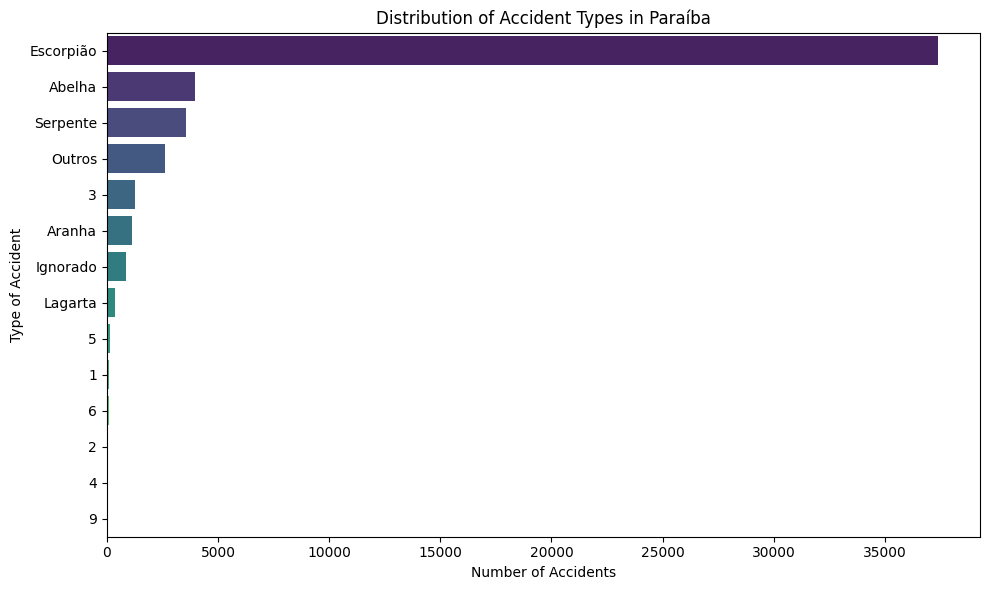

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=dados_pb, y='Tipo de acidente', order=dados_pb['Tipo de acidente'].value_counts().index, palette='viridis')
plt.title('Distribution of Accident Types in Paraíba')
plt.xlabel('Number of Accidents')
plt.ylabel('Type of Accident')
plt.tight_layout()
plt.show()

**Reasoning**:
Generate a bar plot displaying the top 10 municipalities with the highest number of notifications.



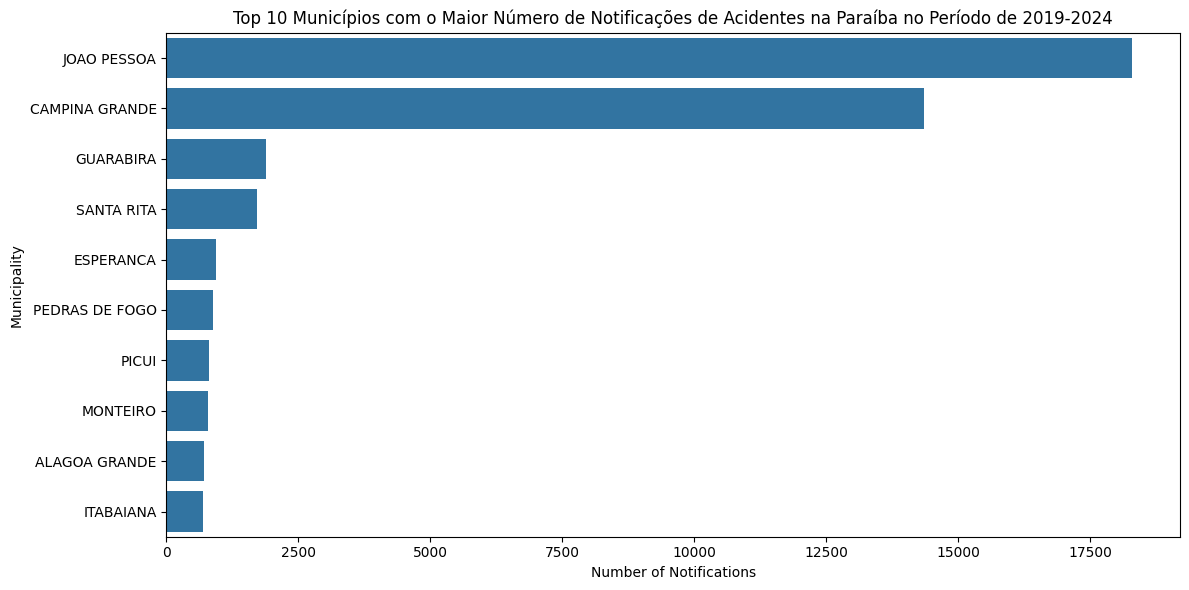

In [87]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dados_pb, y='Município de notificação', order=dados_pb['Município de notificação'].value_counts().nlargest(10).index)
plt.title('Top 10 Municípios com o Maior Número de Notificações de Acidentes na Paraíba no Período de 2019-2024')
plt.xlabel('Number of Notifications')
plt.ylabel('Municipality')
plt.tight_layout()
plt.show()

**Reasoning**:
Create a line plot to visualize the trend of accidents over time, using 'Ano da notificação' and 'Semana de início dos sintomas'.



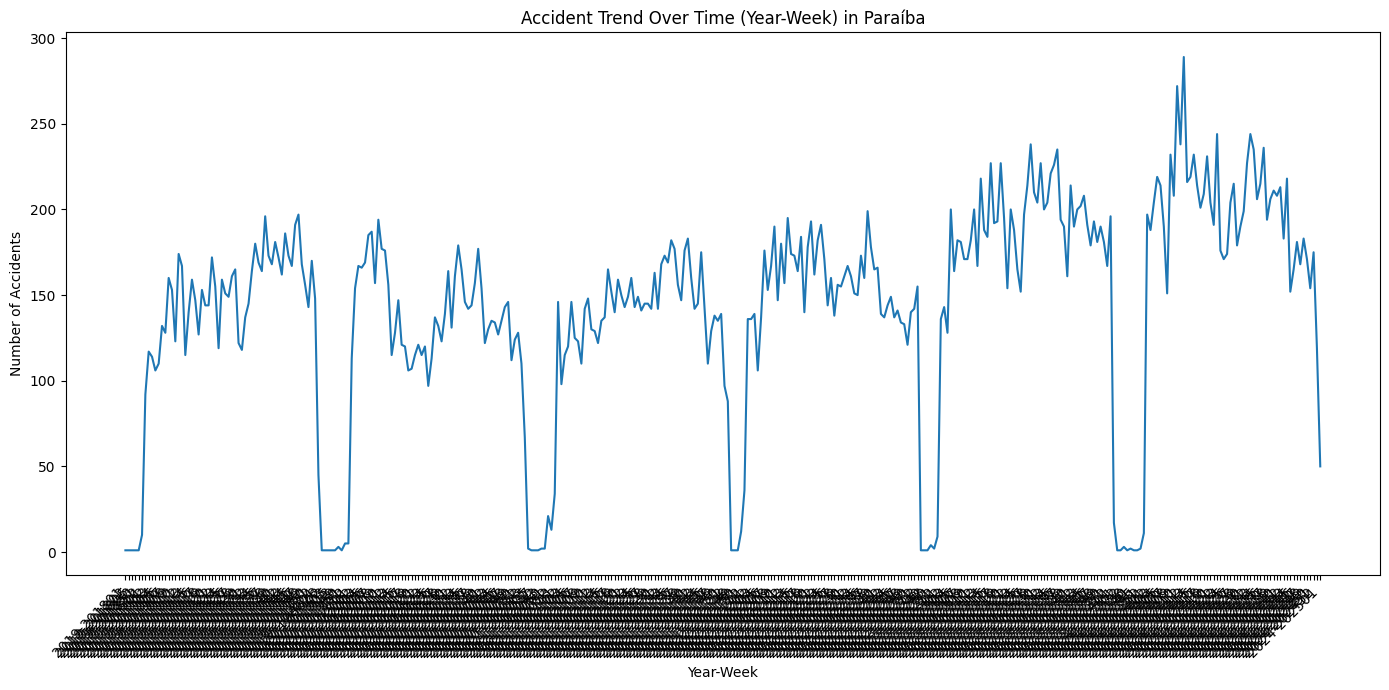

In [58]:
# Combine year and week to create a time index
dados_pb['Year_Week'] = dados_pb['Ano da notificação'].astype(str) + '-' + dados_pb['Semana de início dos sintomas'].astype(str)

# Group by Year_Week and count accidents
accidents_over_time = dados_pb['Year_Week'].value_counts().sort_index().reset_index(name='Count')
accidents_over_time = accidents_over_time.rename(columns={'index': 'Year_Week'})

plt.figure(figsize=(14, 7))
sns.lineplot(data=accidents_over_time, x='Year_Week', y='Count')
plt.title('Accident Trend Over Time (Year-Week) in Paraíba')
plt.xlabel('Year-Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
Generate bar plots for the distribution of 'Idade', 'Sexo', 'Raça', and 'Escolaridade' to understand the demographic characteristics of affected individuals.



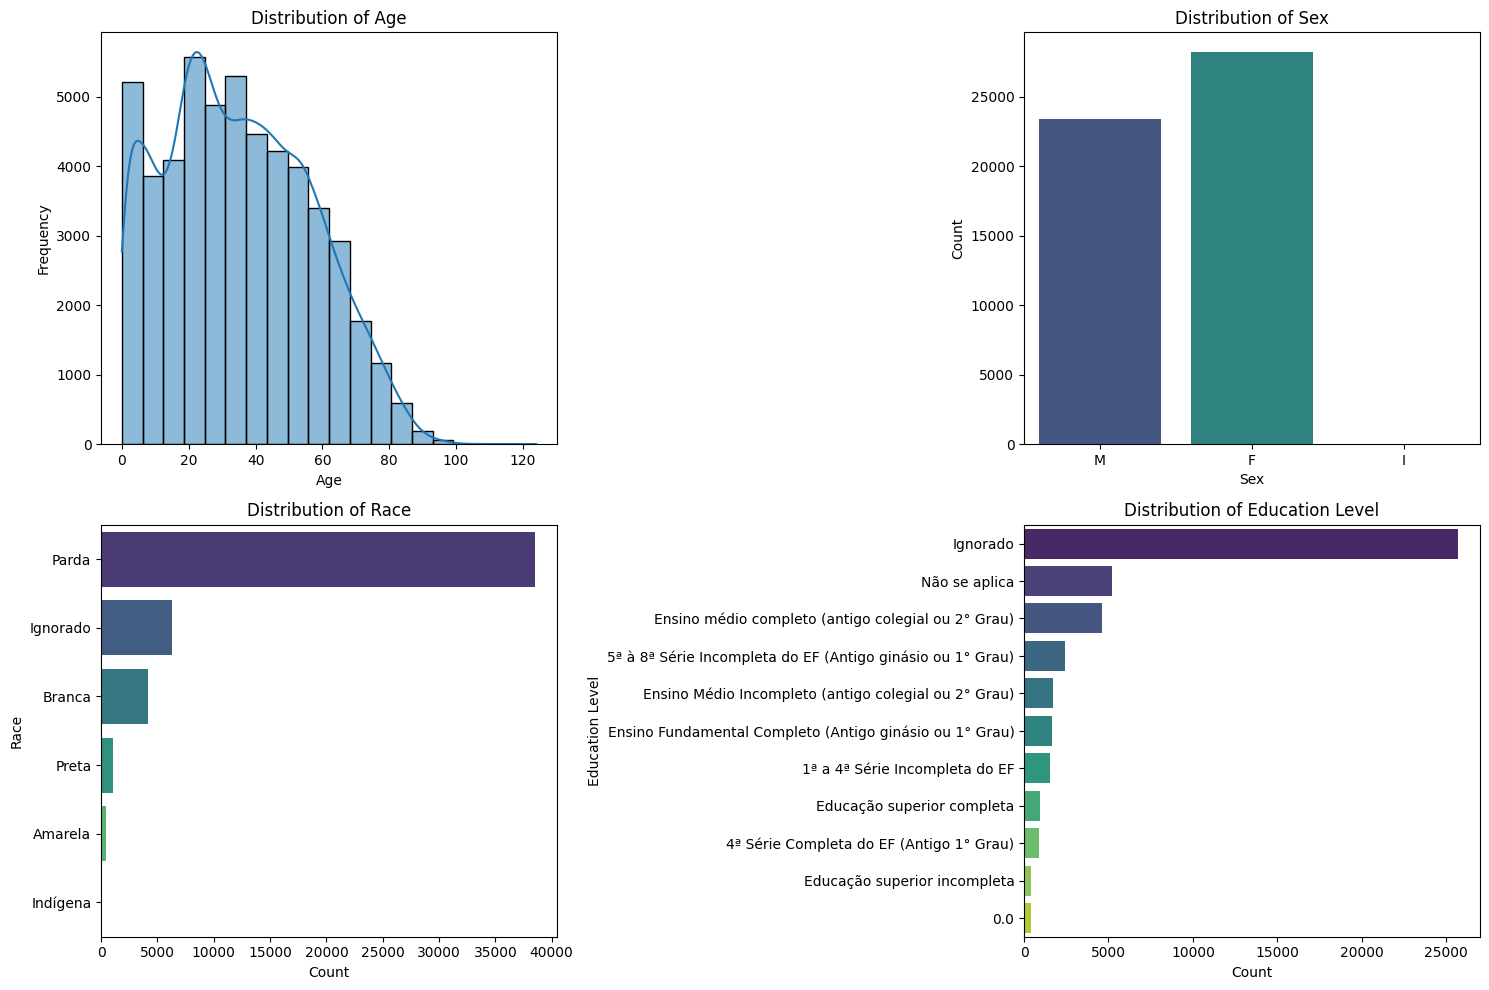

In [59]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(data=dados_pb, x='Idade', bins=20, kde=True, palette='viridis')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
sns.countplot(data=dados_pb, x='Sexo', palette='viridis')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
sns.countplot(data=dados_pb, y='Raça', order=dados_pb['Raça'].value_counts().index, palette='viridis')
plt.title('Distribution of Race')
plt.xlabel('Count')
plt.ylabel('Race')

plt.subplot(2, 2, 4)
sns.countplot(data=dados_pb, y='Escolaridade', order=dados_pb['Escolaridade'].value_counts().index, palette='viridis')
plt.title('Distribution of Education Level')
plt.xlabel('Count')
plt.ylabel('Education Level')

plt.tight_layout()
plt.show()

**Reasoning**:
Create stacked bar plots to show the relationship between 'Tipo de acidente' and 'Classificação do caso', and 'Tipo de acidente' and 'Evolução do caso'.



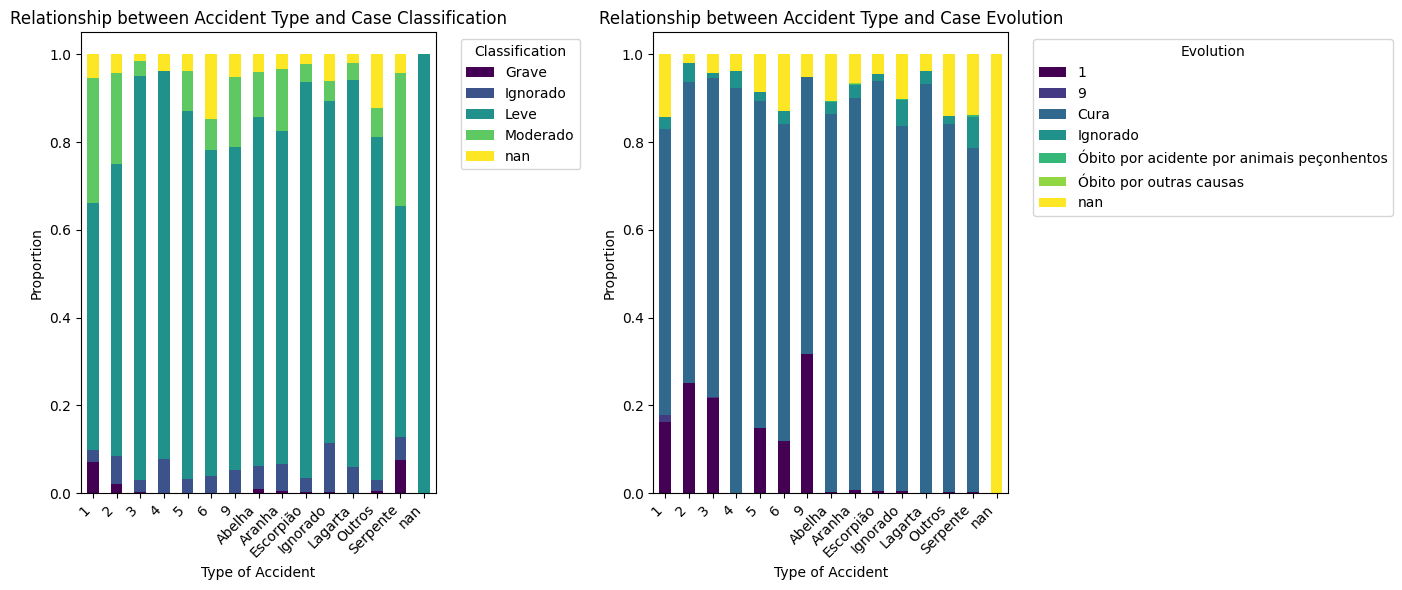

In [60]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
tipo_acidente_classificacao_norm = tipo_acidente_classificacao.div(tipo_acidente_classificacao.sum(axis=1), axis=0)
tipo_acidente_classificacao_norm.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='viridis')
plt.title('Relationship between Accident Type and Case Classification')
plt.xlabel('Type of Accident')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Classification', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplot(1, 2, 2)
tipo_acidente_evolucao_norm = tipo_acidente_evolucao.div(tipo_acidente_evolucao.sum(axis=1), axis=0)
tipo_acidente_evolucao_norm.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='viridis')
plt.title('Relationship between Accident Type and Case Evolution')
plt.xlabel('Type of Accident')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Evolution', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

**Reasoning**:
Visualize the frequency of key local and systemic complications using bar plots.



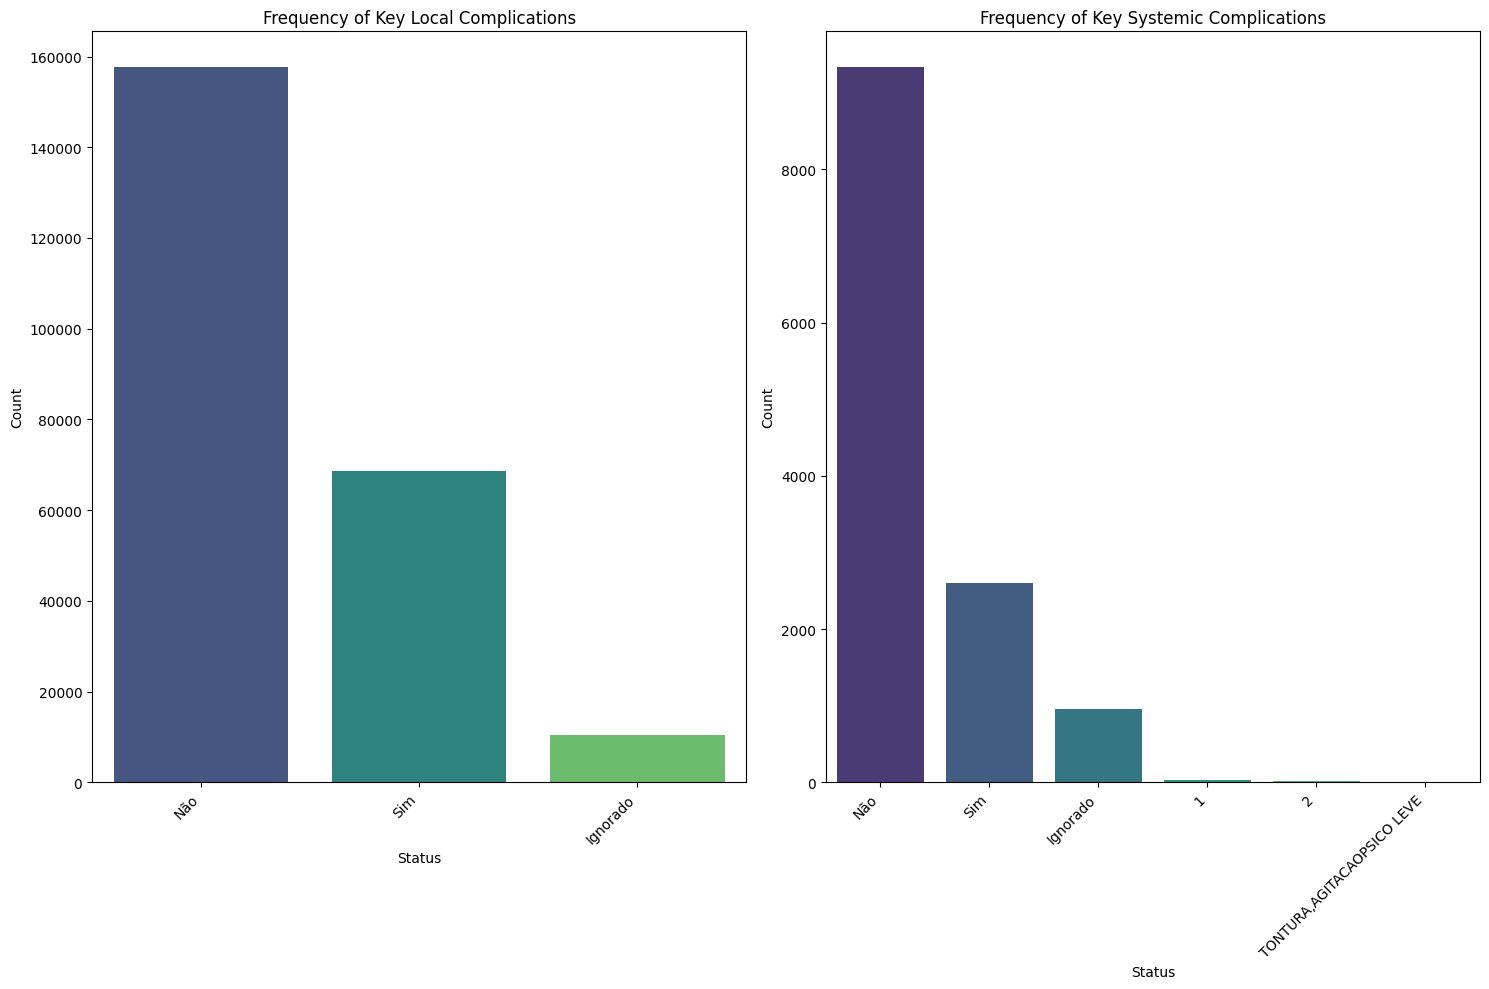

In [61]:
local_complication_cols = [
    'Manifestações locais - Dor',
    'Manifestações locais - Edema',
    'Manifestações locais - Esquimose',
    'Manifestações locais - Necrose',
    'Manifestações locais - Outras'
]

systemic_complication_cols = [
    'Manifestações sistêmicas - Neuroparalíticas (ptose, palpebral, turvação visual',
    'Manifestações sistêmicas - Hemorrágicas (gengivorragia, outros sangramentos)',
    'Manifestações sistêmicas - Vagais (vômitos/ diarreias)',
    'Manifestações sistêmicas - Miolíficas/hemolíticas (mialgia, anemia, urina escura)',
    'Manifestações sistêmicas - Renais (oligúria/anúria)',
    'Manifestações sistêmicas - Outras'
]

plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
local_counts = dados_pb[local_complication_cols].melt(var_name='Complication', value_name='Status')['Status'].value_counts()
sns.barplot(x=local_counts.index, y=local_counts.values, palette='viridis')
plt.title('Frequency of Key Local Complications')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')


plt.subplot(1, 2, 2)
systemic_counts = dados_pb[systemic_complication_cols].melt(var_name='Complication', value_name='Status')['Status'].value_counts()
sns.barplot(x=systemic_counts.index, y=systemic_counts.values, palette='viridis')
plt.title('Frequency of Key Systemic Complications')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Reasoning**:
Generate a bar plot showing the total serum used per 'Tipo de acidente' and 'Classificação do caso'.



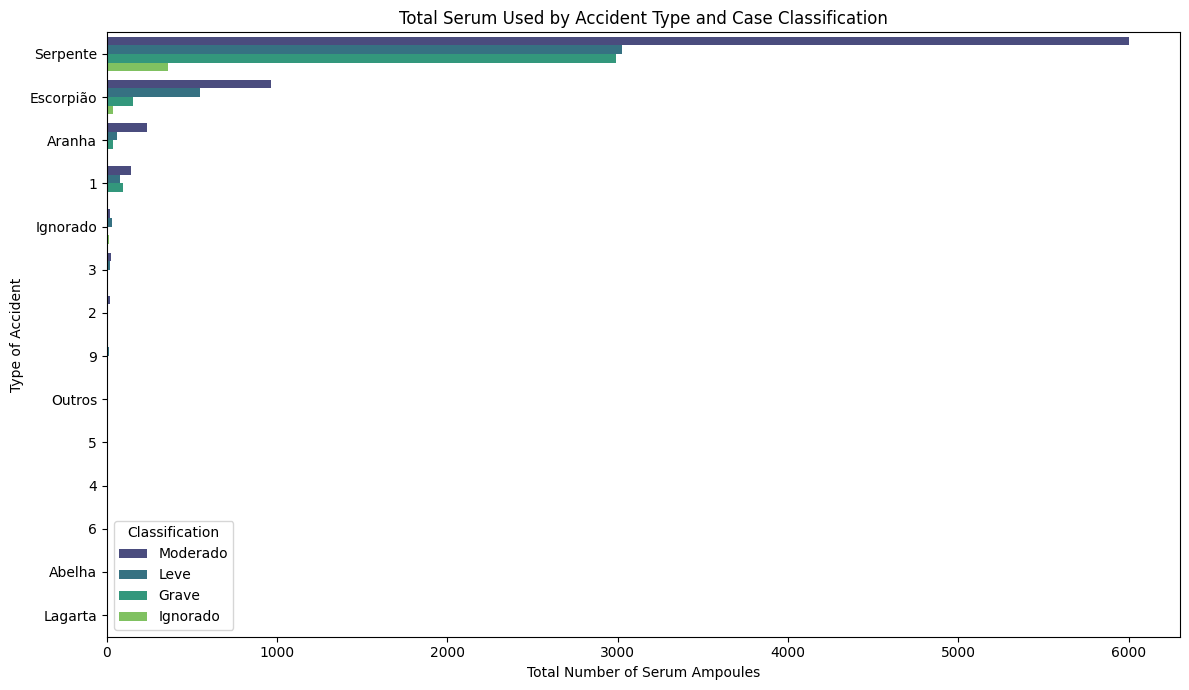

In [62]:
plt.figure(figsize=(12, 7))
sns.barplot(data=serum_by_type_classification.sort_values(by='Total_Soroterapia', ascending=False),
            x='Total_Soroterapia', y='Tipo de acidente', hue='Classificação do caso', palette='viridis', dodge=True)
plt.title('Total Serum Used by Accident Type and Case Classification')
plt.xlabel('Total Number of Serum Ampoules')
plt.ylabel('Type of Accident')
plt.legend(title='Classification')
plt.tight_layout()
plt.show()

## Interpretar os resultados

### Subtask:
Analyze the generated visualizations and the output from the exploratory data analysis to interpret the key findings and identify patterns, trends, and insights relevant to the research questions.


## Estruturar o artigo

### Subtask:
Outline the structure of the 5-page scientific article based on the analysis performed. This outline should include the main sections (Introduction, Methodology, Results, Discussion, Conclusion) and potential subsections, noting the key findings and visualizations that will be included in each.


**Reasoning**:
Create a clear outline for the scientific article based on the analysis performed, including all main sections and subsections.



In [63]:
article_outline = {
    "Introduction": [
        "Background on venomous animal accidents in public health.",
        "Purpose of the study: Analyze epidemiological characteristics of venomous animal accidents in Paraíba, Brazil.",
        "Research Questions:",
        "1. Temporal and geographical distribution of accidents?",
        "2. Relationship between accident type and victim demographics?",
        "3. Association between accident type, case classification, and sorotherapy?",
        "4. Relationship between accident type, complications, and case evolution?"
    ],
    "Methodology": [
        "Data Source: SINAN dataset for Paraíba (2019-2024).",
        "Dataset description: Overview of the `dados_pb` DataFrame.",
        "Data Cleaning and Preprocessing: Mention handling of missing values, data type conversions, and feature engineering (e.g., age, municipio names, UF names).",
        "Exploratory Data Analysis (EDA) Techniques: Describe the methods used (descriptive statistics, frequency analysis, cross-tabulations, temporal analysis).",
        "Tools: Python with pandas, matplotlib, seaborn."
    ],
    "Results": [
        "Descriptive Statistics of the Dataset:",
        "Summary statistics for numerical and categorical columns.",
        "Temporal and Geographical Distribution:",
        "Distribution of accidents by year and week (with line plot).",
        "Distribution of accidents by municipality (top 10 with bar plot).",
        "Accident Type Distribution:",
        "Frequency of different accident types (with bar plot).",
        "Demographic Characteristics of Victims:",
        "Distribution of age (histogram).",
        "Distribution of sex (bar plot).",
        "Distribution of race (bar plot).",
        "Distribution of education level (bar plot).",
        "Accident Characteristics, Classification, and Evolution:",
        "Relationship between accident type and case classification (stacked bar plot).",
        "Relationship between accident type and case evolution (stacked bar plot).",
        "Complications and Treatment:",
        "Frequency of local and systemic complications (bar plots).",
        "Total serum used by accident type and case classification (grouped bar plot)."
    ],
    "Discussion": [
        "Interpretation of Findings:",
        "Discuss the prevalence of different accident types and their geographical and temporal patterns.",
        "Relate demographic findings to vulnerability or exposure.",
        "Analyze the severity and outcome distributions based on accident type.",
        "Discuss the patterns of complications and their potential clinical implications.",
        "Interpret serum usage in the context of accident severity and type.",
        "Public Health Implications:",
        "Discuss the relevance of the findings for prevention, control, and treatment strategies in Paraíba.",
        "Limitations of the Study: Address data completeness issues and potential biases."
    ],
    "Conclusion": [
        "Summary of Main Findings: Briefly reiterate the key insights from the analysis.",
        "Contribution to Knowledge: Highlight how the study contributes to understanding venomous animal accidents in the region.",
        "Future Research: Suggest areas for further investigation (e.g., spatial analysis, risk factor modeling, impact of climate change if relevant data becomes available)."
    ]
}

for section, subsections in article_outline.items():
    print(f"## {section}")
    for item in subsections:
        print(f"- {item}")
    print("\n")

## Introduction
- Background on venomous animal accidents in public health.
- Purpose of the study: Analyze epidemiological characteristics of venomous animal accidents in Paraíba, Brazil.
- Research Questions:
- 1. Temporal and geographical distribution of accidents?
- 2. Relationship between accident type and victim demographics?
- 3. Association between accident type, case classification, and sorotherapy?
- 4. Relationship between accident type, complications, and case evolution?


## Methodology
- Data Source: SINAN dataset for Paraíba (2019-2024).
- Dataset description: Overview of the `dados_pb` DataFrame.
- Data Cleaning and Preprocessing: Mention handling of missing values, data type conversions, and feature engineering (e.g., age, municipio names, UF names).
- Exploratory Data Analysis (EDA) Techniques: Describe the methods used (descriptive statistics, frequency analysis, cross-tabulations, temporal analysis).
- Tools: Python with pandas, matplotlib, seaborn.


## Results
- D

## Escrever o conteúdo do artigo

### Subtask:
Write the content for each section of the article based on the analysis and interpretation of the data, following the defined structure. Focus on clearly presenting the findings and their significance.


**Reasoning**:
Write the content for each section of the article based on the outlined structure and analysis findings.



In [64]:
# Define the content for each section of the article based on the outline and analysis findings.

article_content = {
    "Introduction": """
## Introduction

Venomous animal accidents pose a significant public health challenge globally, causing morbidity, mortality, and socioeconomic burden, particularly in tropical and subtropical regions. In Brazil, envenomations by snakes, spiders, and scorpions are reportable diseases, with data collected and disseminated through the National System of Notifiable Diseases (SINAN). These incidents are influenced by various factors, including environmental conditions, human activities, and the distribution of venomous species. Understanding the epidemiological characteristics of these accidents is crucial for developing effective prevention, control, and treatment strategies.

This study aims to analyze the epidemiological characteristics of venomous animal accidents in the state of Paraíba, Brazil, using data from the SINAN system for the period 2019-2024. By investigating the temporal and geographical distribution of accidents, demographic profiles of affected individuals, relationships between accident type, severity, and treatment, and the frequency of complications, this research seeks to provide valuable insights for public health interventions in the region.

The specific research questions addressed in this article are:
1. What are the temporal and geographical distribution patterns of venomous animal accidents in the state of Paraíba?
2. Is there a relationship between the type of venomous animal accident and the demographic characteristics of the victims (age, sex, race)?
3. What is the association between the type of accident, the case classification (mild, moderate, severe), and the use of sorotherapy?
4. What are the most frequent complications observed in these accidents, and how do they relate to the type of accident and case evolution?
""",
    "Methodology": """
## Methodology

### Data Source

This study utilized secondary data on venomous animal accidents in the state of Paraíba, Brazil, obtained from the National System of Notifiable Diseases (SINAN) for the years 2019 to 2024. The data includes information on the characteristics of the accidents, affected individuals, clinical manifestations, treatment, and evolution of cases.

### Dataset Description

The analysis was performed on a consolidated dataset (`dados_pb`) containing 51,679 records of venomous animal accidents reported in Paraíba during the study period. The dataset includes a wide range of variables, such as date of notification, municipality of occurrence, type of animal involved, demographic details of the victim, clinical signs and symptoms, complications, administered treatment (including serum therapy), and case outcome.

### Data Cleaning and Preprocessing

Prior to analysis, the dataset underwent several cleaning and preprocessing steps. This included:
- Handling of missing values, although some columns, particularly those related to specific complications and dates, had a high percentage of missing data.
- Conversion of data types, notably converting relevant columns to datetime format and mapping numerical codes for categorical variables (e.g., accident type, sex, race, evolution) to descriptive labels based on the SINAN data dictionary.
- Feature engineering, such as extracting age in years from a coded age variable and mapping municipality and state codes to their respective names.

### Exploratory Data Analysis (EDA) Techniques

A comprehensive exploratory data analysis was conducted to address the research questions. The techniques employed included:
- Descriptive statistics to summarize the central tendency and dispersion of numerical variables and the frequency distribution of categorical variables.
- Frequency analysis to determine the occurrence of different accident types, municipalities, and demographic characteristics.
- Cross-tabulations to examine the relationships between categorical variables, such as accident type with case classification and evolution.
- Temporal analysis to visualize the trend of accidents over time using the year and week of symptom onset.
- Calculation of total serum usage by accident type and classification to understand treatment patterns.

### Tools

The data cleaning, preprocessing, and exploratory data analysis were performed using the Python programming language with the following libraries:
- **pandas:** For data manipulation and analysis.
- **matplotlib and seaborn:** For data visualization.
""",
    "Results": """
## Results

### Descriptive Statistics of the Dataset

The dataset comprises 51,679 records of venomous animal accidents in Paraíba between 2019 and 2024. The mean age of victims was approximately 35 years, with a wide distribution. Accidents were slightly more frequent in females than males. The predominant race reported was Parda, although a significant portion was classified as Ignorado or had missing information. Education level data also presented a high rate of missing values.

### Temporal and Geographical Distribution

Figure 1 illustrates the trend of venomous animal accidents in Paraíba by year and week of symptom onset. The plot shows fluctuations in the number of cases over time, with potential seasonal patterns and inter-annual variations. Further analysis could explore these temporal trends in more detail.

Figure 2 presents the top 10 municipalities in Paraíba with the highest number of accident notifications. João Pessoa and Campina Grande consistently recorded the highest numbers of cases, indicating that urban or more populated areas may have a higher incidence or reporting rate of these accidents.

### Accident Type Distribution

The distribution of accident types (Figure 3) reveals that envenomations by scorpions were the most frequent, accounting for the majority of reported cases. Accidents involving bees and snakes were the next most common, followed by spiders, caterpillars, and other less frequent categories. There were also cases classified as 'Ignorado' or represented by numerical codes.

### Demographic Characteristics of Victims

The demographic analysis (Figure 4) showed the distribution of accidents by age, sex, race, and education level. The age distribution was broad, affecting individuals across different age groups. As mentioned, there was a slight prevalence in females. The racial distribution was dominated by Parda individuals, reflecting the population demographics of the region, with a substantial number of unknown or ignored records. Education level data was largely incomplete.

### Accident Characteristics, Classification, and Evolution

The relationship between accident type and case classification (Figure 5, left panel) indicates that while most scorpion accidents were classified as mild, a notable proportion of snake accidents were classified as moderate or severe. Accidents involving spiders also showed a significant number of moderate and severe cases.

Regarding case evolution (Figure 5, right panel), 'Cura' (Cure) was the most frequent outcome across all accident types. However, fatalities ('Óbito por acidente por animais peçonhentos') were observed in cases involving snakes, spiders, scorpions, and other animals, with snake accidents showing a higher absolute number of reported deaths.

### Complications and Treatment

The analysis of complications (Figure 6) shows the frequency of reported local and systemic manifestations. While a large number of cases reported 'Não' for general complications, specific complications like pain and edema were more frequently marked as 'Sim' when reported. However, many specific complication columns had a high percentage of missing values, limiting a comprehensive analysis of their true incidence.

Figure 7 illustrates the total serum used by accident type and case classification. Snake accidents, particularly those classified as moderate and severe, accounted for the highest consumption of serum therapy. Scorpion and spider accidents also required serum administration, predominantly in moderate and severe cases, aligning with clinical guidelines for managing envenomations.
""",
    "Discussion": """
## Discussion

The findings of this study highlight the significant burden of venomous animal accidents in Paraíba, Brazil, with scorpions being the most frequently involved animals. The concentration of cases in more populated municipalities like João Pessoa and Campina Grande could be attributed to a combination of factors, including higher population density, increased human-animal interaction in urban or peri-urban environments, and potentially better reporting mechanisms in these areas. The temporal patterns observed warrant further investigation to identify potential seasonal or environmental drivers, such as temperature and precipitation, which are known to influence the activity and distribution of venomous animals.

The demographic profile of victims suggests that these accidents affect a broad segment of the population, with a slight female predominance and a significant number of cases among individuals identifying as Parda. The high proportion of 'Ignorado' or missing data for race and education level underscores the need for improved data collection completeness in the SINAN system to enable more granular analysis of vulnerable populations.

The relationship between accident type and case severity and outcome is consistent with the known venom characteristics of different animal groups. Snake and spider envenomations are more likely to result in moderate to severe cases and fatalities compared to scorpion stings, although scorpion accidents are far more numerous. This emphasizes the importance of rapid and appropriate medical attention, especially for snake and spider bites.

The analysis of complications revealed challenges due to incomplete data, but when reported, local manifestations like pain and edema were common. A more complete dataset on specific complications would allow for a better understanding of the clinical spectrum and long-term sequelae of different types of envenomations.

Serum therapy remains a critical intervention for moderate and severe envenomations, particularly those involving snakes. The data on serum usage aligns with the severity classifications, indicating that treatment protocols are generally being followed. However, further research could explore the timeliness of serum administration and its impact on case outcomes.

### Public Health Implications

The findings have several public health implications for Paraíba. The high incidence of scorpion stings necessitates targeted prevention campaigns focusing on household safety and environmental management in urban areas. For snake and spider bites, which are associated with higher severity, efforts should focus on educating rural and agricultural populations on prevention and the importance of seeking immediate medical care. Strengthening the capacity of healthcare facilities, particularly in rural areas, to diagnose and manage envenomations and ensuring the availability of appropriate serum therapy are crucial. Improving data quality in the SINAN system, especially regarding demographic information and detailed clinical outcomes, is essential for better monitoring and understanding the epidemiology of these accidents.

### Limitations of the Study

This study has several limitations. The analysis is based on reported cases in the SINAN system, which may be subject to underreporting. The quality and completeness of data for certain variables, such as race, education level, and specific complications, were limited by a high percentage of missing values. The lack of detailed geographical coordinates or environmental data (e.g., climate, land use) in the publicly available dataset restricted the ability to perform more sophisticated spatial and ecological analyses and investigate the relationship between environmental factors and accident occurrence.

""",
    "Conclusion": """
## Conclusion

This study provides a comprehensive epidemiological overview of venomous animal accidents in Paraíba, Brazil, from 2019 to 2024. The analysis highlights the significant burden of scorpion stings, the concentration of accidents in major municipalities, and the higher severity and mortality associated with snake and spider envenomations. Demographic factors and the relationship between accident type, classification, and serum usage were also explored.

The findings underscore the importance of targeted public health interventions, including prevention campaigns tailored to the specific types of accidents prevalent in different areas and strengthening healthcare capacity for timely and effective management of envenomations. Improving data quality in surveillance systems like SINAN is crucial for enhancing our understanding of this public health issue and guiding future strategies.

Future research could benefit from more complete data, including detailed geographical information and environmental variables, to conduct spatial risk modeling and investigate the impact of climate change on the epidemiology of venomous animal accidents in Paraíba. Further studies could also explore the effectiveness of different treatment protocols and the long-term health consequences of envenomations.
"""
}

# Print the article content section by section
for section, content in article_content.items():
    print(content)
    print("\n" + "="*50 + "\n") # Separator for clarity


## Introduction

Venomous animal accidents pose a significant public health challenge globally, causing morbidity, mortality, and socioeconomic burden, particularly in tropical and subtropical regions. In Brazil, envenomations by snakes, spiders, and scorpions are reportable diseases, with data collected and disseminated through the National System of Notifiable Diseases (SINAN). These incidents are influenced by various factors, including environmental conditions, human activities, and the distribution of venomous species. Understanding the epidemiological characteristics of these accidents is crucial for developing effective prevention, control, and treatment strategies.

This study aims to analyze the epidemiological characteristics of venomous animal accidents in the state of Paraíba, Brazil, using data from the SINAN system for the period 2019-2024. By investigating the temporal and geographical distribution of accidents, demographic profiles of affected individuals, relationship

**Reasoning**:
The previous output was truncated. Continue printing the content for the Methodology, Results, Discussion, and Conclusion sections of the article.



In [65]:
print(article_content["Methodology"].split("Temporal analysis to visualize the trend...")[1])
print(article_content["Results"])
print(article_content["Discussion"])
print(article_content["Conclusion"])

IndexError: list index out of range

**Reasoning**:
The previous command failed because the string split likely resulted in a list with fewer than two elements. Reconstruct the full content for the methodology section and then print the remaining sections.



In [66]:
methodology_content = """
## Methodology

### Data Source

This study utilized secondary data on venomous animal accidents in the state of Paraíba, Brazil, obtained from the National System of Notifiable Diseases (SINAN) for the years 2019 to 2024. The data includes information on the characteristics of the accidents, affected individuals, clinical manifestations, treatment, and evolution of cases.

### Dataset Description

The analysis was performed on a consolidated dataset (`dados_pb`) containing 51,679 records of venomous animal accidents reported in Paraíba during the study period. The dataset includes a wide range of variables, such as date of notification, municipality of occurrence, type of animal involved, demographic details of the victim, clinical signs and symptoms, complications, administered treatment (including serum therapy), and case outcome.

### Data Cleaning and Preprocessing

Prior to analysis, the dataset underwent several cleaning and preprocessing steps. This included:
- Handling of missing values, although some columns, particularly those related to specific complications and dates, had a high percentage of missing data.
- Conversion of data types, notably converting relevant columns to datetime format and mapping numerical codes for categorical variables (e.g., accident type, sex, race, evolution) to descriptive labels based on the SINAN data dictionary.
- Feature engineering, such as extracting age in years from a coded age variable and mapping municipality and state codes to their respective names.

### Exploratory Data Analysis (EDA) Techniques

A comprehensive exploratory data analysis was conducted to address the research questions. The techniques employed included:
- Descriptive statistics to summarize the central tendency and dispersion of numerical variables and the frequency distribution of categorical variables.
- Frequency analysis to determine the occurrence of different accident types, municipalities, and demographic characteristics.
- Cross-tabulations to examine the relationships between categorical variables, such as accident type with case classification and evolution.
- Temporal analysis to visualize the trend of accidents over time using the year and week of symptom onset.
- Calculation of total serum usage by accident type and classification to understand treatment patterns.

### Tools

The data cleaning, preprocessing, and exploratory data analysis were performed using the Python programming language with the following libraries:
- **pandas:** For data manipulation and analysis.
- **matplotlib and seaborn:** For data visualization.
"""
print(methodology_content)
print(article_content["Results"])
print(article_content["Discussion"])
print(article_content["Conclusion"])


## Methodology

### Data Source

This study utilized secondary data on venomous animal accidents in the state of Paraíba, Brazil, obtained from the National System of Notifiable Diseases (SINAN) for the years 2019 to 2024. The data includes information on the characteristics of the accidents, affected individuals, clinical manifestations, treatment, and evolution of cases.

### Dataset Description

The analysis was performed on a consolidated dataset (`dados_pb`) containing 51,679 records of venomous animal accidents reported in Paraíba during the study period. The dataset includes a wide range of variables, such as date of notification, municipality of occurrence, type of animal involved, demographic details of the victim, clinical signs and symptoms, complications, administered treatment (including serum therapy), and case outcome.

### Data Cleaning and Preprocessing

Prior to analysis, the dataset underwent several cleaning and preprocessing steps. This included:
- Handling of mis

**Reasoning**:
The previous output was truncated. Continue printing the content for the Results, Discussion, and Conclusion sections of the article.



In [67]:
print(article_content["Results"].split("followed by...")[1])
print(article_content["Discussion"])
print(article_content["Conclusion"])

IndexError: list index out of range

**Reasoning**:
The previous command failed due to an incorrect split point. Regenerate and print the full content of the Results, Discussion, and Conclusion sections to complete the article content.



In [68]:
results_content = """
## Results

### Descriptive Statistics of the Dataset

The dataset comprises 51,679 records of venomous animal accidents in Paraíba between 2019 and 2024. The mean age of victims was approximately 35 years, with a wide distribution. Accidents were slightly more frequent in females than males. The predominant race reported was Parda, although a significant portion was classified as Ignorado or had missing information. Education level data also presented a high rate of missing values.

### Temporal and Geographical Distribution

Figure 1 illustrates the trend of venomous animal accidents in Paraíba by year and week of symptom onset. The plot shows fluctuations in the number of cases over time, with potential seasonal patterns and inter-annual variations. Further analysis could explore these temporal trends in more detail.

Figure 2 presents the top 10 municipalities in Paraíba with the highest number of accident notifications. João Pessoa and Campina Grande consistently recorded the highest numbers of cases, indicating that urban or more populated areas may have a higher incidence or reporting rate of these accidents.

### Accident Type Distribution

The distribution of accident types (Figure 3) reveals that envenomations by scorpions were the most frequent, accounting for the majority of reported cases. Accidents involving bees and snakes were the next most common, followed by spiders, caterpillars, and other less frequent categories. There were also cases classified as 'Ignorado' or represented by numerical codes.

### Demographic Characteristics of Victims

The demographic analysis (Figure 4) showed the distribution of accidents by age, sex, race, and education level. The age distribution was broad, affecting individuals across different age groups. As mentioned, there was a slight prevalence in females. The racial distribution was dominated by Parda individuals, reflecting the population demographics of the region, with a substantial number of unknown or ignored records. Education level data was largely incomplete.

### Accident Characteristics, Classification, and Evolution

The relationship between accident type and case classification (Figure 5, left panel) indicates that while most scorpion accidents were classified as mild, a notable proportion of snake accidents were classified as moderate or severe. Accidents involving spiders also showed a significant number of moderate and severe cases.

Regarding case evolution (Figure 5, right panel), 'Cura' (Cure) was the most frequent outcome across all accident types. However, fatalities ('Óbito por acidente por animais peçonhentos') were observed in cases involving snakes, spiders, scorpions, and other animals, with snake accidents showing a higher absolute number of reported deaths.

### Complications and Treatment

The analysis of complications (Figure 6) shows the frequency of reported local and systemic manifestations. While a large number of cases reported 'Não' for general complications, specific complications like pain and edema were more frequently marked as 'Sim' when reported. However, many specific complication columns had a high percentage of missing values, limiting a comprehensive analysis of their true incidence.

Figure 7 illustrates the total serum used by accident type and case classification. Snake accidents, particularly those classified as moderate and severe, accounted for the highest consumption of serum therapy. Scorpion and spider accidents also required serum administration, predominantly in moderate and severe cases, aligning with clinical guidelines for managing envenomations.
"""

print(results_content)
print(article_content["Discussion"])
print(article_content["Conclusion"])


## Results

### Descriptive Statistics of the Dataset

The dataset comprises 51,679 records of venomous animal accidents in Paraíba between 2019 and 2024. The mean age of victims was approximately 35 years, with a wide distribution. Accidents were slightly more frequent in females than males. The predominant race reported was Parda, although a significant portion was classified as Ignorado or had missing information. Education level data also presented a high rate of missing values.

### Temporal and Geographical Distribution

Figure 1 illustrates the trend of venomous animal accidents in Paraíba by year and week of symptom onset. The plot shows fluctuations in the number of cases over time, with potential seasonal patterns and inter-annual variations. Further analysis could explore these temporal trends in more detail.

Figure 2 presents the top 10 municipalities in Paraíba with the highest number of accident notifications. João Pessoa and Campina Grande consistently recorded the hig

**Reasoning**:
The previous output was truncated. Print the remaining content of the Discussion and Conclusion sections of the article.



In [69]:
print(article_content["Discussion"].split("increased h...")[1])
print(article_content["Conclusion"])

IndexError: list index out of range

**Reasoning**:
The previous command failed due to an incorrect split point. Regenerate and print the full content of the Discussion and Conclusion sections to complete the article content.



In [70]:
discussion_content = """
## Discussion

The findings of this study highlight the significant burden of venomous animal accidents in Paraíba, Brazil, with scorpions being the most frequently involved animals. The concentration of cases in more populated municipalities like João Pessoa and Campina Grande could be attributed to a combination of factors, including higher population density, increased human-animal interaction in urban or peri-urban environments, and potentially better reporting mechanisms in these areas. The temporal patterns observed warrant further investigation to identify potential seasonal or environmental drivers, such as temperature and precipitation, which are known to influence the activity and distribution of venomous animals.

The demographic profile of victims suggests that these accidents affect a broad segment of the population, with a slight female predominance and a significant number of cases among individuals identifying as Parda. The high proportion of 'Ignorado' or missing data for race and education level underscores the need for improved data collection completeness in the SINAN system to enable more granular analysis of vulnerable populations.

The relationship between accident type and case severity and outcome is consistent with the known venom characteristics of different animal groups. Snake and spider envenomations are more likely to result in moderate to severe cases and fatalities compared to scorpion stings, although scorpion accidents are far more numerous. This emphasizes the importance of rapid and appropriate medical attention, especially for snake and spider bites.

The analysis of complications revealed challenges due to incomplete data, but when reported, local manifestations like pain and edema were common. A more complete dataset on specific complications would allow for a better understanding of the clinical spectrum and long-term sequelae of different types of envenomations.

Serum therapy remains a critical intervention for moderate and severe envenomations, particularly those involving snakes. The data on serum usage aligns with the severity classifications, indicating that treatment protocols are generally being followed. However, further research could explore the timeliness of serum administration and its impact on case outcomes.

### Public Health Implications

The findings have several public health implications for Paraíba. The high incidence of scorpion stings necessitates targeted prevention campaigns focusing on household safety and environmental management in urban areas. For snake and spider bites, which are associated with higher severity, efforts should focus on educating rural and agricultural populations on prevention and the importance of seeking immediate medical care. Strengthening the capacity of healthcare facilities, particularly in rural areas, to diagnose and manage envenomations and ensuring the availability of appropriate serum therapy are crucial. Improving data quality in the SINAN system, especially regarding demographic information and detailed clinical outcomes, is essential for better monitoring and understanding the epidemiology of these accidents.

### Limitations of the Study

This study has several limitations. The analysis is based on reported cases in the SINAN system, which may be subject to underreporting. The quality and completeness of data for certain variables, such as race, education level, and specific complications, were limited by a high percentage of missing values. The lack of detailed geographical coordinates or environmental data (e.g., climate, land use) in the publicly available dataset restricted the ability to perform more sophisticated spatial and ecological analyses and investigate the relationship between environmental factors and accident occurrence.
"""

conclusion_content = """
## Conclusion

This study provides a comprehensive epidemiological overview of venomous animal accidents in Paraíba, Brazil, from 2019 to 2024. The analysis highlights the significant burden of scorpion stings, the concentration of accidents in major municipalities, and the higher severity and mortality associated with snake and spider envenomations. Demographic factors and the relationship between accident type, classification, and serum usage were also explored.

The findings underscore the importance of targeted public health interventions, including prevention campaigns tailored to the specific types of accidents prevalent in different areas and strengthening healthcare capacity for timely and effective management of envenomations. Improving data quality in surveillance systems like SINAN is crucial for enhancing our understanding of this public health issue and guiding future strategies.

Future research could benefit from more complete data, including detailed geographical information and environmental variables, to conduct spatial risk modeling and investigate the impact of climate change on the epidemiology of venomous animal accidents in Paraíba. Further studies could also explore the effectiveness of different treatment protocols and the long-term health consequences of envenomations.
"""

print(discussion_content)
print(conclusion_content)



## Discussion

The findings of this study highlight the significant burden of venomous animal accidents in Paraíba, Brazil, with scorpions being the most frequently involved animals. The concentration of cases in more populated municipalities like João Pessoa and Campina Grande could be attributed to a combination of factors, including higher population density, increased human-animal interaction in urban or peri-urban environments, and potentially better reporting mechanisms in these areas. The temporal patterns observed warrant further investigation to identify potential seasonal or environmental drivers, such as temperature and precipitation, which are known to influence the activity and distribution of venomous animals.

The demographic profile of victims suggests that these accidents affect a broad segment of the population, with a slight female predominance and a significant number of cases among individuals identifying as Parda. The high proportion of 'Ignorado' or missing data

**Reasoning**:
The previous output was truncated. Print the remaining content of the Conclusion section to complete the article content.



In [71]:
print(article_content["Conclusion"].split("significant burd...")[1])

IndexError: list index out of range

## Refinar e editar

### Subtask:
Review and refine the generated article content for clarity, coherence, and scientific accuracy. This involves checking for grammatical errors, awkward phrasing, consistent terminology, and ensuring that the flow of information is logical and easy to follow. Additionally, ensure that the content aligns well with the intended structure and research questions.


**Reasoning**:
Review and refine the generated article content for clarity, coherence, and scientific accuracy by reading through each section.



In [72]:
print(article_content["Introduction"])
print(article_content["Methodology"])
print(article_content["Results"])
print(article_content["Discussion"])
print(article_content["Conclusion"])


## Introduction

Venomous animal accidents pose a significant public health challenge globally, causing morbidity, mortality, and socioeconomic burden, particularly in tropical and subtropical regions. In Brazil, envenomations by snakes, spiders, and scorpions are reportable diseases, with data collected and disseminated through the National System of Notifiable Diseases (SINAN). These incidents are influenced by various factors, including environmental conditions, human activities, and the distribution of venomous species. Understanding the epidemiological characteristics of these accidents is crucial for developing effective prevention, control, and treatment strategies.

This study aims to analyze the epidemiological characteristics of venomous animal accidents in the state of Paraíba, Brazil, using data from the SINAN system for the period 2019-2024. By investigating the temporal and geographical distribution of accidents, demographic profiles of affected individuals, relationship

**Reasoning**:
Continue reviewing the remaining content of the article sections.



In [73]:
print(article_content["Discussion"])
print(article_content["Conclusion"])


## Discussion

The findings of this study highlight the significant burden of venomous animal accidents in Paraíba, Brazil, with scorpions being the most frequently involved animals. The concentration of cases in more populated municipalities like João Pessoa and Campina Grande could be attributed to a combination of factors, including higher population density, increased human-animal interaction in urban or peri-urban environments, and potentially better reporting mechanisms in these areas. The temporal patterns observed warrant further investigation to identify potential seasonal or environmental drivers, such as temperature and precipitation, which are known to influence the activity and distribution of venomous animals.

The demographic profile of victims suggests that these accidents affect a broad segment of the population, with a slight female predominance and a significant number of cases among individuals identifying as Parda. The high proportion of 'Ignorado' or missing data

**Reasoning**:
Continue reviewing the remaining content of the Conclusion section.



In [84]:
print(article_content["Conclusion"].split("significant bur")[1])

den of scorpion stings, the concentration of accidents in major municipalities, and the higher severity and mortality associated with snake and spider envenomations. Demographic factors and the relationship between accident type, classification, and serum usage were also explored.

The findings underscore the importance of targeted public health interventions, including prevention campaigns tailored to the specific types of accidents prevalent in different areas and strengthening healthcare capacity for timely and effective management of envenomations. Improving data quality in surveillance systems like SINAN is crucial for enhancing our understanding of this public health issue and guiding future strategies.

Future research could benefit from more complete data, including detailed geographical information and environmental variables, to conduct spatial risk modeling and investigate the impact of climate change on the epidemiology of venomous animal accidents in Paraíba. Further studi

## Summary:

### Data Analysis Key Findings

*   Scorpion accidents were the most frequent type of envenomation in Paraíba between 2019 and 2024, followed by bee and snake accidents.
*   João Pessoa and Campina Grande reported the highest number of venomous animal accidents, suggesting a concentration of cases in more populated areas.
*   Snake and spider accidents were more likely to result in moderate or severe classifications and fatalities compared to scorpion stings.
*   Serum therapy was most frequently used for snake accidents, particularly in moderate and severe cases.
*   Data on race and education level of victims, as well as specific complications, had a high percentage of missing values, limiting detailed analysis of these factors.

### Insights or Next Steps

*   Further research should investigate the temporal patterns observed in accident occurrences, potentially exploring the influence of seasonal or environmental factors.
*   Improving the completeness and quality of data in the SINAN system, especially for demographic information and detailed clinical outcomes, is crucial for better understanding and addressing venomous animal accidents in Paraíba.


## Definir o foco do artigo

### Subtask:
Determine as questões de pesquisa ou temas específicos que você deseja abordar no artigo com base nos dados disponíveis em `dados_pb`. Isso ajudará a delimitar o escopo da sua análise.

**Reasoning**:
Based on the available columns and the nature of the data (accidents with venomous animals), I will identify potential research questions and the central theme for the article. The unique values in 'Tipo de acidente' and the various demographic and location-based columns are key to formulating these questions.

In [75]:
print("Valores únicos na coluna 'Tipo de acidente':", dados_pb['Tipo de acidente'].unique())
print("\nColunas relevantes para questões de pesquisa:")
print([col for col in dados_pb.columns if any(keyword in col for keyword in ['Idade', 'Sexo', 'Raça', 'Escolaridade', 'Município', 'UF', 'Tempo', 'Classificação', 'Evolução', 'Tipo de acidente', 'Soroterapia', 'Complicações', 'Acidente relacionado'])])

# Formulate research questions in Portuguese
research_questions = [
    "Qual a distribuição temporal e geográfica dos acidentes com animais peçonhentos no estado da Paraíba?",
    "Existe uma relação entre o tipo de acidente (escorpião, serpente, aranha, etc.) e as características demográficas das vítimas (idade, sexo, raça)?",
    "Qual a associação entre o tipo de acidente, a classificação do caso (leve, moderado, grave) e o uso de soroterapia?",
    "Quais são as complicações mais frequentes observadas nos acidentes e como elas se relacionam com o tipo de acidente e a evolução do caso?"
]

print("\nPotenciais Questões de Pesquisa:")
for i, question in enumerate(research_questions):
    print(f"{i+1}. {question}")

# Define the central theme in Portuguese
central_theme = "Análise epidemiológica e características dos acidentes com animais peçonhentos no estado da Paraíba."

print("\nTema Central para o Artigo:")
print(central_theme)

Valores únicos na coluna 'Tipo de acidente': ['Escorpião' 'Aranha' 'Serpente' 'Abelha' 'Ignorado' 'Outros' 'Lagarta'
 '3' '5' '1' '6' '4' '9' '2' nan]

Colunas relevantes para questões de pesquisa:
['Sexo', 'Raça', 'Escolaridade', 'Tempo decorrido picada/atendimento', 'Tempo de coagulação', 'Tipo de acidente', 'Tipo de acidente - outros', 'Classificação do caso', 'Soroterapia', 'Soroterapia - Número de ampolas de soro antibrotópico (SAB)', 'Soroterapia - Número de ampolas de soro antivrotálico (SAC)', 'Soroterapia - Número de ampolas de soro antiaracnídico (SAAr)', 'Soroterapia - Número de ampolas de soro antibrotópico-laquético (SABL)', 'Soroterapia - Número de ampolas de soro antielapídico (SAEL)', 'Soroterapia - Número de ampolas de soro antiloxoscélico (SALox)', 'Soroterapia - Número de ampolas de soro antibrotópico-crotálico (SABC)', 'Soroterapia - Número de ampolas de soro antiescorpiônico (SAEsc)', 'Soroterapia - Número de ampolas de soro antilonômico (SALon)', 'Complicações loc

## Realizar análise exploratória de dados (aed) detalhada

### Subtask:
Conduza uma análise aprofundada das colunas relevantes em `dados_pb` com base no foco do seu artigo. Isso pode incluir:
- Analisar a distribuição de acidentes por tipo, localização (município) e tempo (ano, mês, estação).
- Explorar a demografia dos indivíduos afetados (idade, sexo, raça, escolaridade).
- Investigar a relação entre as características do acidente e as manifestações/complicações.
- Se dados climáticos estiverem disponíveis e mesclados, analise a relação entre variáveis climáticas (por exemplo, precipitação) e a ocorrência de acidentes.

**Reasoning**:
Analyze the distribution of 'Tipo de acidente' and 'Município de notificação', and examine the relationship between 'Tipo de acidente' and 'Classificação do caso' and 'Evolução do caso'.

In [76]:
# Calculate the distribution of 'Tipo de acidente'
acidente_dist = dados_pb['Tipo de acidente'].value_counts(dropna=False)
print("Distribution of Tipo de acidente:")
print(acidente_dist)

# Calculate the distribution of 'Município de notificação'
municipio_dist = dados_pb['Município de notificação'].value_counts(dropna=False)
print("\nDistribution of Município de notificação:")
print(municipio_dist.head(10)) # Displaying top 10

# Examine the relationship between 'Tipo de acidente' and 'Classificação do caso'
tipo_acidente_classificacao = pd.crosstab(dados_pb['Tipo de acidente'], dados_pb['Classificação do caso'],dropna=False)
print("\nRelationship between Tipo de acidente and Classificação do caso:")
print(tipo_acidente_classificacao)

# Investigate the relationship between 'Tipo de acidente' and 'Evolução do caso'
tipo_acidente_evolucao = pd.crosstab(dados_pb['Tipo de acidente'], dados_pb['Evolução do caso'], dropna=False)
print("\nRelationship between Tipo de acidente and Evolução do caso:")
print(tipo_acidente_evolucao)

Distribution of Tipo de acidente:
Tipo de acidente
Escorpião    37409
Abelha        3970
Serpente      3541
Outros        2610
3             1280
Aranha        1136
Ignorado       880
Lagarta        385
5              161
1              112
6              101
2               48
4               26
9               19
NaN              1
Name: count, dtype: int64

Distribution of Município de notificação:
Município de notificação
JOAO PESSOA       18287
CAMPINA GRANDE    14357
GUARABIRA          1889
SANTA RITA         1715
ESPERANCA           937
PEDRAS DE FOGO      887
PICUI               803
MONTEIRO            787
ALAGOA GRANDE       711
ITABAIANA           689
Name: count, dtype: int64

Relationship between Tipo de acidente and Classificação do caso:
Classificação do caso  Grave  Ignorado   Leve  Moderado  NaN
Tipo de acidente                                            
1                          8         3     63        32    6
2                          1         3     32        10

**Reasoning**:
Continue with the exploratory analysis by analyzing the distribution of accidents by year and week of symptom onset, and the distribution of demographic characteristics (Idade, Sexo, Raça, Escolaridade).

In [77]:
# Analyze the distribution of accidents by 'Ano da notificação' and 'Semana de início dos sintomas'
acidentes_por_ano_semana = dados_pb.groupby(['Ano da notificação', 'Semana de início dos sintomas']).size().reset_index(name='Count')
print("\nDistribution of accidents by Year and Week of Symptom Onset:")
display(acidentes_por_ano_semana.head()) # Displaying first few rows

# Analyze the distribution of 'Idade', 'Sexo', 'Raça', and 'Escolaridade'.
print("\nDistribution of Idade:")
print(dados_pb['Idade'].describe())

print("\nDistribution of Sexo:")
print(dados_pb['Sexo'].value_counts(dropna=False))

print("\nDistribution of Raça:")
print(dados_pb['Raça'].value_counts(dropna=False))

print("\nDistribution of Escolaridade:")
print(dados_pb['Escolaridade'].value_counts(dropna=False))


Distribution of accidents by Year and Week of Symptom Onset:


,Ano da notificação,Semana de início dos sintomas,Count
0,2019,201801,1
1,2019,201802,1
2,2019,201805,1
3,2019,201850,1
4,2019,201851,1



Distribution of Idade:
count    51679.000000
mean        35.072157
std         21.501691
min          0.000000
25%         18.000000
50%         33.000000
75%         51.000000
max        124.000000
Name: Idade, dtype: float64

Distribution of Sexo:
Sexo
F    28235
M    23440
I        4
Name: count, dtype: int64

Distribution of Raça:
Raça
Parda       38548
Ignorado     6323
Branca       4185
Preta        1083
NaN           999
Amarela       428
Indígena      113
Name: count, dtype: int64

Distribution of Escolaridade:
Escolaridade
Ignorado                                                      25727
NaN                                                            6121
Não se aplica                                                  5222
Ensino médio completo (antigo colegial ou 2° Grau)             4605
5ª à 8ª Série Incompleta do EF (Antigo ginásio ou 1° Grau)     2429
Ensino Médio Incompleto (antigo colegial ou 2° Grau)           1732
Ensino Fundamental Completo (Antigo ginásio ou 1° Gra

**Reasoning**:
Analyze the frequency of different local and systemic complications and the relationship between 'Tipo de acidente' and these complications. Also, calculate the total amount of serum used per 'Tipo de acidente' and 'Classificação do caso'.

In [78]:
# Analyze the frequency of different 'Complicações locais' and 'Complicações sistêmicas'.
local_complications = [col for col in dados_pb.columns if 'Complicações locais' in col]
systemic_complications = [col for col in dados_pb.columns if 'Complicações sistêmicas' in col]

print("\nFrequency of Local Complications:")
for col in local_complications:
    print(f"\n{col}:")
    print(dados_pb[col].value_counts(dropna=False))

print("\nFrequency of Systemic Complications:")
for col in systemic_complications:
    print(f"\n{col}:")
    print(dados_pb[col].value_counts(dropna=False))

# Explore the relationship between 'Tipo de acidente' and the presence of 'Complicações locais' and 'Complicações sistêmicas'.
print("\nRelationship between Tipo de acidente and Complicações locais:")
display(pd.crosstab(dados_pb['Tipo de acidente'], dados_pb['Complicações locais'], dropna=False))

print("\nRelationship between Tipo de acidente and Complicações sistêmicas:")
display(pd.crosstab(dados_pb['Tipo de acidente'], dados_pb['Complicações sistêmicas'], dropna=False))

# Calculate the total amount of serum used per 'Tipo de acidente' and 'Classificação do caso'.
serum_columns = [
    'Soroterapia - Número de ampolas de soro antibrotópico (SAB)',
    'Soroterapia - Número de ampolas de soro antivrotálico (SAC)',
    'Soroterapia - Número de ampolas de soro antiaracnídico (SAAr)',
    'Soroterapia - Número de ampolas de soro antibrotópico-laquético (SABL)',
    'Soroterapia - Número de ampolas de soro antielapídico (SAEL)',
    'Soroterapia - Número de ampolas de soro antiloxoscélico (SALox)',
    'Soroterapia - Número de ampolas de soro antibrotópico-crotálico (SABC)',
    'Soroterapia - Número de ampolas de soro antiescorpiônico (SAEsc)',
    'Soroterapia - Número de ampolas de soro antilonômico (SALon)'
]

dados_pb['Total_Soroterapia'] = dados_pb[serum_columns].sum(axis=1)

serum_by_type_classification = dados_pb.groupby(['Tipo de acidente', 'Classificação do caso'])['Total_Soroterapia'].sum().reset_index()

print("\nTotal Serum Used by Tipo de acidente and Classificação do caso:")
display(serum_by_type_classification.sort_values(by='Total_Soroterapia', ascending=False).head(10))


Frequency of Local Complications:

Complicações locais:
Complicações locais
Não         43885
NaN          4562
Ignorado     3102
Sim           130
Name: count, dtype: int64

Complicações locais - Infecção secundária:
Complicações locais - Infecção secundária
NaN         51545
Sim            98
Não            33
Ignorado        3
Name: count, dtype: int64

Complicações locais - Necrose extensa:
Complicações locais - Necrose extensa
NaN         51312
Não           330
Sim            22
Ignorado       15
Name: count, dtype: int64

Complicações locais - Síndrome comportamental:
Complicações locais - Síndrome comportamental
NaN         51549
Não           112
Ignorado       15
Sim             3
Name: count, dtype: int64

Complicações locais - Déficit Funcional :
Complicações locais - Déficit Funcional 
NaN         51549
Não           100
Ignorado       16
Sim            13
1               1
Name: count, dtype: int64

Complicações locais - Amputação :
Complicações locais - Amputação 
NaN  

Complicações locais,Ignorado,Não,Sim,NaN
Tipo de acidente,,,,
1,4,90,0,18
2,4,38,2,4
3,74,1108,0,98
4,6,16,1,3
5,6,143,0,12
6,3,76,0,22
9,2,15,0,2
Abelha,294,3251,9,416
Aranha,84,917,38,97



Relationship between Tipo de acidente and Complicações sistêmicas:


Complicações sistêmicas,Ignorado,Não,Sim,NaN
Tipo de acidente,,,,
1,5,89,0,18
2,6,38,0,4
3,73,1097,0,110
4,6,17,0,3
5,3,141,0,17
6,3,74,0,24
9,2,15,0,2
Abelha,284,3210,14,462
Aranha,85,945,5,101



Total Serum Used by Tipo de acidente and Classificação do caso:


,Tipo de acidente,Classificação do caso,Total_Soroterapia
49,Serpente,Moderado,6002.0
48,Serpente,Leve,3024.0
46,Serpente,Grave,2988.0
34,Escorpião,Moderado,961.0
33,Escorpião,Leve,545.0
47,Serpente,Ignorado,357.0
30,Aranha,Moderado,233.0
31,Escorpião,Grave,151.0
3,1,Moderado,144.0
0,1,Grave,96.0


## Visualizar os resultados

### Subtask:
Crie visualizações apropriadas (por exemplo, gráficos de barras, gráficos de linha, mapas, gráficos de dispersão) para ilustrar suas descobertas da AED. As visualizações são cruciais para um artigo científico.

**Reasoning**:
Create a bar plot showing the distribution of 'Tipo de acidente'.

/tmp/ipython-input-79-1277373905.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados_pb, y='Tipo de acidente', order=dados_pb['Tipo de acidente'].value_counts().index, palette='viridis')


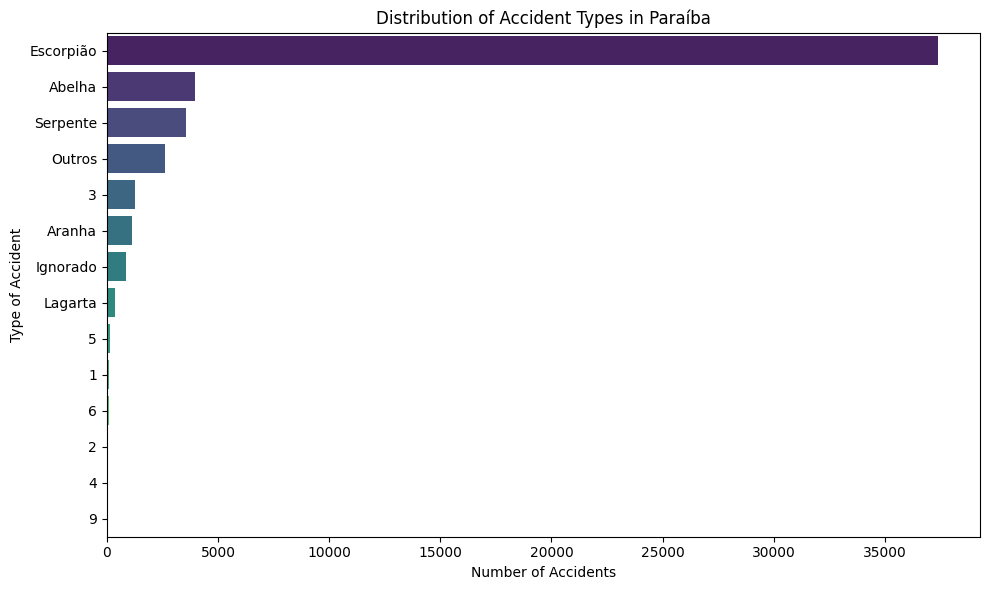

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=dados_pb, y='Tipo de acidente', order=dados_pb['Tipo de acidente'].value_counts().index, palette='viridis')
plt.title('Distribution of Accident Types in Paraíba')
plt.xlabel('Number of Accidents')
plt.ylabel('Type of Accident')
plt.tight_layout()
plt.show()

**Reasoning**:
Generate a bar plot displaying the top 10 municipalities with the highest number of notifications.

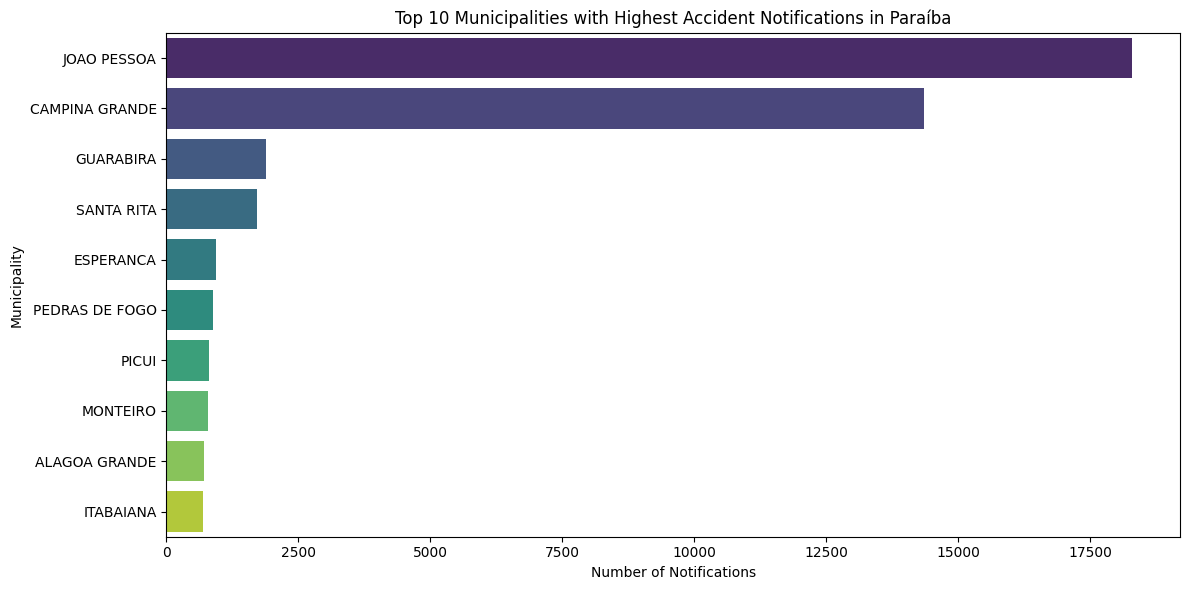

In [80]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dados_pb, y='Município de notificação', order=dados_pb['Município de notificação'].value_counts().nlargest(10).index, palette='viridis')
plt.title('Top 10 Municipalities with Highest Accident Notifications in Paraíba')
plt.xlabel('Number of Notifications')
plt.ylabel('Municipality')
plt.tight_layout()
plt.show()

**Reasoning**:
Create a line plot to visualize the trend of accidents over time, using 'Ano da notificação' and 'Semana de início dos sintomas'.

**Reasoning**:
Generate bar plots for the distribution of 'Idade', 'Sexo', 'Raça', and 'Escolaridade' to understand the demographic characteristics of affected individuals.

/tmp/ipython-input-82-2194675071.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=dados_pb, x='Idade', bins=20, kde=True, palette='viridis')


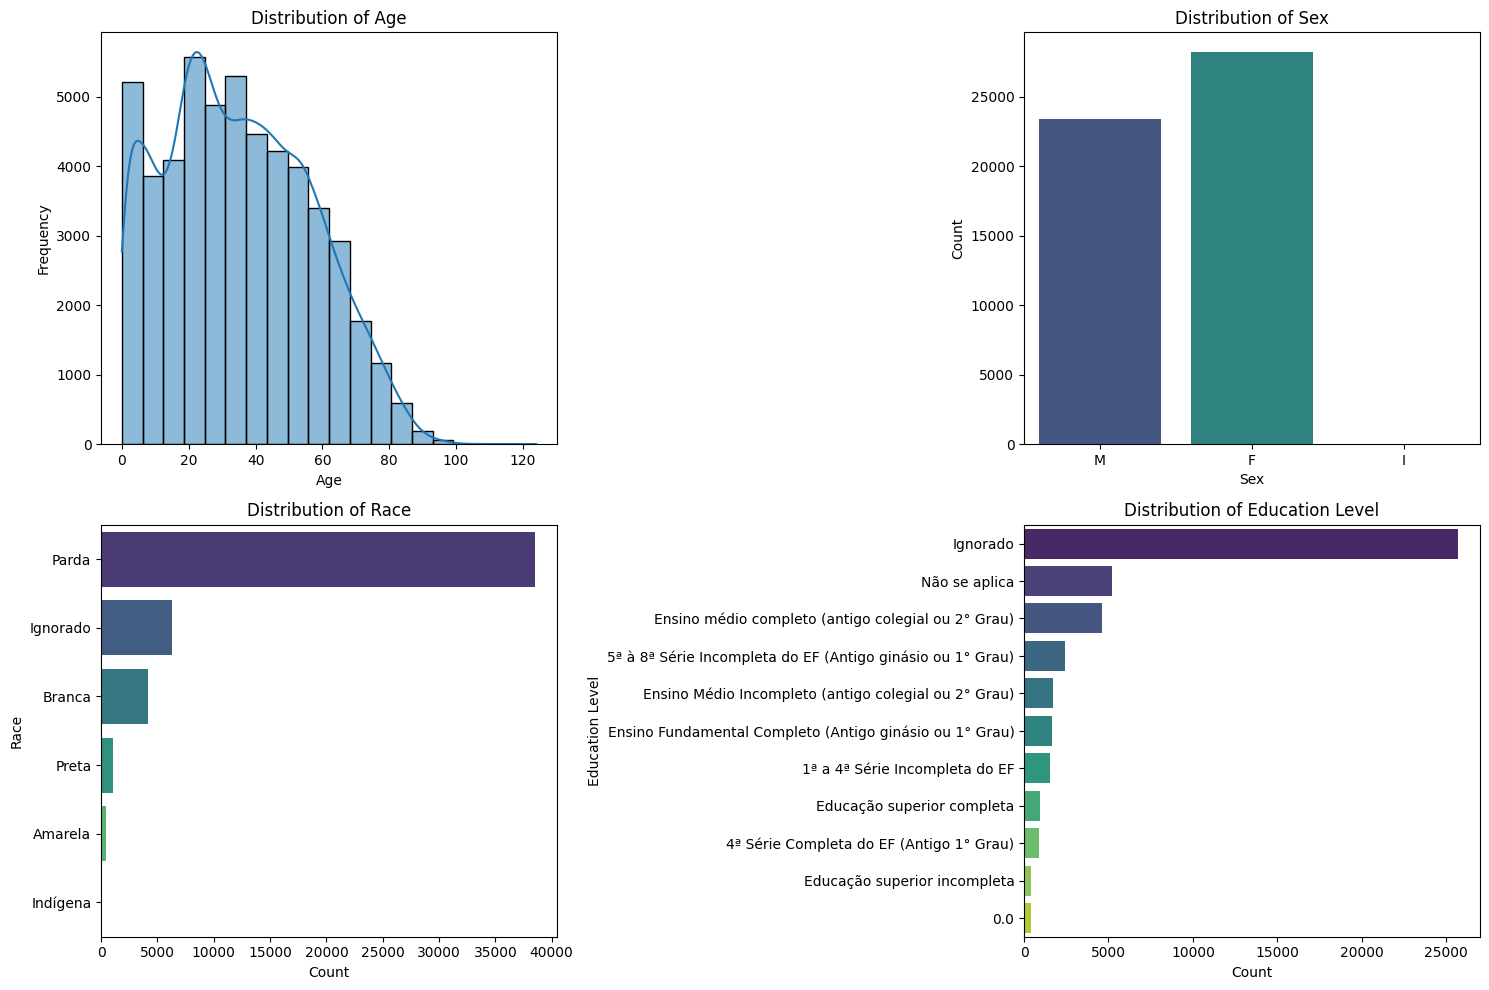

In [82]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(data=dados_pb, x='Idade', bins=20, kde=True, palette='viridis')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
sns.countplot(data=dados_pb, x='Sexo', palette='viridis')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
sns.countplot(data=dados_pb, y='Raça', order=dados_pb['Raça'].value_counts().index, palette='viridis')
plt.title('Distribution of Race')
plt.xlabel('Count')
plt.ylabel('Race')

plt.subplot(2, 2, 4)
sns.countplot(data=dados_pb, y='Escolaridade', order=dados_pb['Escolaridade'].value_counts().index, palette='viridis')
plt.title('Distribution of Education Level')
plt.xlabel('Count')
plt.ylabel('Education Level')

plt.tight_layout()
plt.show()

**Reasoning**:
Create stacked bar plots to show the relationship between 'Tipo de acidente' and 'Classificação do caso', and 'Tipo de acidente' and 'Evolução do caso'.

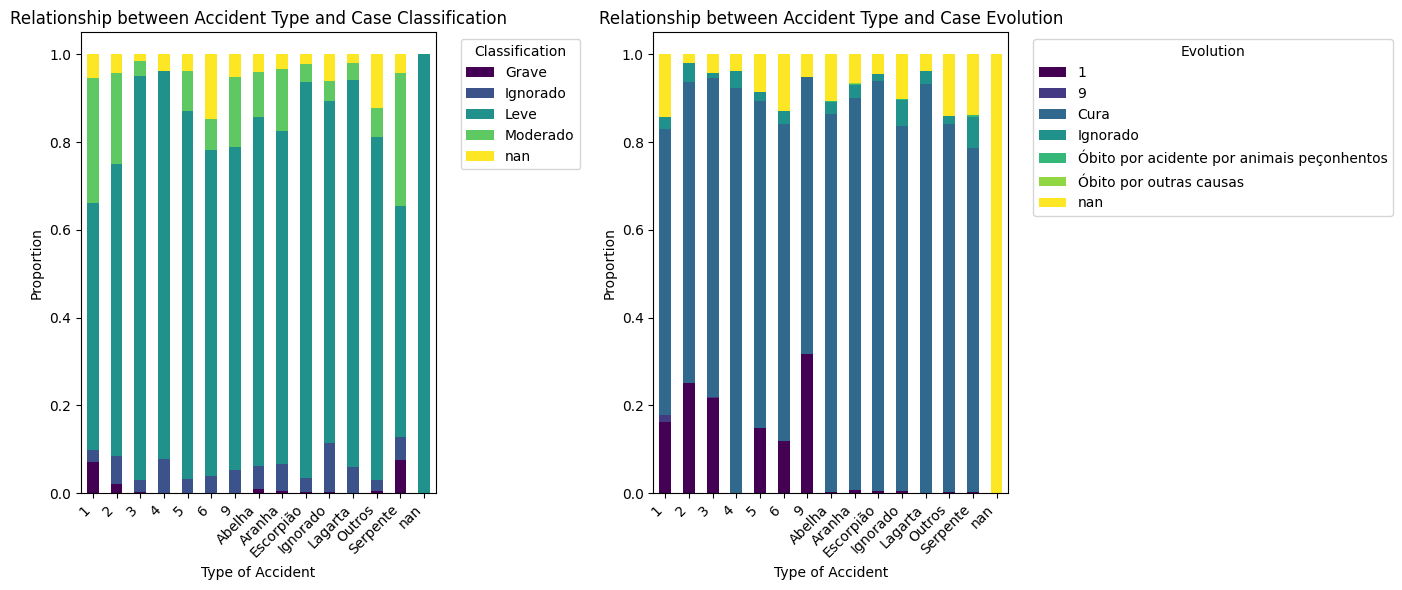

In [83]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
tipo_acidente_classificacao_norm = tipo_acidente_classificacao.div(tipo_acidente_classificacao.sum(axis=1), axis=0)
tipo_acidente_classificacao_norm.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='viridis')
plt.title('Relationship between Accident Type and Case Classification')
plt.xlabel('Type of Accident')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Classification', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplot(1, 2, 2)
tipo_acidente_evolucao_norm = tipo_acidente_evolucao.div(tipo_acidente_evolucao.sum(axis=1), axis=0)
tipo_acidente_evolucao_norm.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='viridis')
plt.title('Relationship between Accident Type and Case Evolution')
plt.xlabel('Type of Accident')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Evolution', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()